<div style="text-align: right">INFO 7900 Master's Thesis with Noctis Zhang</div>
<div style="text-align: right">Dino Konstantopoulos experiments, 18 - 26 May 2023</div>

# 1. Traverse City

We attempt to verify that cloud sequences are contiguous

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

I think this is just winter months:

In [6]:
les = pd.read_csv(r'D:\user\docs\NU\_info6106\fp\sp.23\team_aditi-abhishek\2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp (F) RH (%)  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...       48     89  ...   

  Low Cloud Ht (ft) Med Cloud Ht (ft) High Cloud Ht (ft) Visibility (mi)  \
0              4100              4800               7000              10   
1              6000                 m                  m              10   
2              5500             11000                  m              10   
3              6000                 m                  m              10   
4              2200              3500                  m               8   

  Atm Press (hPa) Sea Lev Press (hPa) Altimeter (hPa) Precip (in)  \
0           984.0             1007.00         1006.80        0.00   
1           983.7             1006.50         1006.40        0.00   
2           982.7             1005.70         1005.40        0.00   
3           982.0             1005.10         1004.70        0.00   
4           982.0             1004.90         1004.70        0.02   

  Wind Chill (F) Heat Index (F)  
0             45             NC  
1             44             NC  
2             45             NC  
3             44             NC  
4             46             NC  

[5 rows x 24 columns]

# 2. EDA

In [7]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [7]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp_F RH_pct  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...     48     86  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...     48     86  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...     48     86  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...     48     86  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...     48     89  ...   

  Low_Cloud_Ht_ft Med_Cloud_Ht_ft High_Cloud_Ht_ft Visibility_mi  \
0            4100            4800             7000            10   
1            6000               m                m            10   
2            5500           11000                m            10   
3            6000               m                m            10   
4            2200            3500                m             8   

  Atm_Press_hPa Sea_Lev_Press_hPa Altimeter_hPa Precip_in Wind_Chill_F  \
0         984.0           1007.00       1006.80      0.00           45   
1         983.7           1006.50       1006.40      0.00           44   
2         982.7           1005.70       1005.40      0.00           45   
3         982.0           1005.10       1004.70      0.00           44   
4         982.0           1004.90       1004.70      0.02           46   

  Heat_Index_F  
0           NC  
1           NC  
2           NC  
3           NC  
4           NC  

[5 rows x 24 columns]

#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [8]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

#### Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values

In [9]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [10]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

Total Null  Percentage Null
Date_UTC                        0         0.000000
Time_UTC                        0         0.000000
Date_CST                        0         0.000000
Time_CST                        0         0.000000
File_name_for_1D_lake           0         0.000000
File_name_for_2D_lake           0         0.000000
Lake_data_1D                    0         0.000000
Lake_data_2D                    0         0.000000
Temp_F                        239         0.004991
RH_pct                        239         0.004991
Dewpt_F                       239         0.004991
Wind_Spd_mph                  239         0.004991
Wind_Direction_deg            239         0.004991
Peak_Wind_Gust_mph            239         0.004991
Low_Cloud_Ht_ft               239         0.004991
Med_Cloud_Ht_ft               239         0.004991
High_Cloud_Ht_ft              239         0.004991
Visibility_mi                 239         0.004991
Atm_Press_hPa                 239         0.004991
Sea_Lev_Press_hPa             239         0.004991
Altimeter_hPa                 239         0.004991
Precip_in                     239         0.004991

Dropping null values:

In [11]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  47882


>**Note to self**: Next run, replace NA with 0 because we may actually have erased too many records by dropping NAs...

#### Changing Datatype

In [12]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               47882 non-null  object
 1   Time_UTC               47882 non-null  object
 2   Date_CST               47882 non-null  object
 3   Time_CST               47882 non-null  object
 4   File_name_for_1D_lake  47882 non-null  object
 5   File_name_for_2D_lake  47882 non-null  object
 6   Lake_data_1D           47882 non-null  object
 7   Lake_data_2D           47882 non-null  object
 8   Temp_F                 47882 non-null  object
 9   RH_pct                 47882 non-null  object
 10  Dewpt_F                47882 non-null  object
 11  Wind_Spd_mph           47882 non-null  object
 12  Wind_Direction_deg     47882 non-null  object
 13  Peak_Wind_Gust_mph     47882 non-null  object
 14  Low_Cloud_Ht_ft        47882 non-null  object
 15  Med_Cloud_Ht_ft    

In [13]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [14]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               47882 non-null  object 
 1   Time_UTC               47882 non-null  object 
 2   Date_CST               47882 non-null  object 
 3   Time_CST               47882 non-null  object 
 4   File_name_for_1D_lake  47882 non-null  object 
 5   File_name_for_2D_lake  47882 non-null  object 
 6   Lake_data_1D           47882 non-null  object 
 7   Lake_data_2D           47882 non-null  object 
 8   Temp_F                 47882 non-null  float64
 9   RH_pct                 47882 non-null  float64
 10  Dewpt_F                47882 non-null  float64
 11  Wind_Spd_mph           47882 non-null  int64  
 12  Wind_Direction_deg     47882 non-null  int64  
 13  Peak_Wind_Gust_mph     47882 non-null  int64  
 14  Low_Cloud_Ht_ft        47882 non-null  int64  
 15  Me

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [15]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

Date_UTC Time_UTC    Date_CST Time_CST  \
14     2006-10-01    14:00  2006-10-01    14:00   
15     2006-10-01    15:00  2006-10-01    15:00   
16     2006-10-01    16:00  2006-10-01    16:00   
17     2006-10-01    17:00  2006-10-01    17:00   
18     2006-10-01    18:00  2006-10-01    18:00   
...           ...      ...         ...      ...   
48114  2015-03-31    17:00  2015-03-31    17:00   
48115  2015-03-31    18:00  2015-03-31    18:00   
48116  2015-03-31    19:00  2015-03-31    19:00   
48117  2015-03-31    20:00  2015-03-31    20:00   
48118  2015-03-31    21:00  2015-03-31    21:00   

                           File_name_for_1D_lake  \
14     goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
15     goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
16     goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
17     goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
18     goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
48114  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
48115  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
48116  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
48117  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
48118  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
14     T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
15     T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
16     T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
17     T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
18     T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
48114  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
48115  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
48116  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
48117  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
48118  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
14     [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
15     [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
16     [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
17     [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
18     [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
48114  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
48115  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
48116  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
48117  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
48118  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  ...  \
14     [array([       nan,        nan,        nan,   ...    60.0    49.0  ...   
15     [array([       nan,        nan,        nan,   ...    60.0    47.0  ...   
16     [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0  ...   
17     [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0  ...   
18     [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0  ...   
...                                                  ...     ...     ...  ...   
48114  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0  ...   
48115  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0  ...   
48116  [array([       nan,        nan,        nan,   ...    37.0    66.0  ...   
48117  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0  ...   
48118  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0  ...   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
14                    270                   0             3600   
15                      0                   0                0   
16                     40                   0                0   
17                      0                   0                0   
18                      0                   0     

In [16]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    14:00  2006-10-01    14:00   
1  2006-10-01    15:00  2006-10-01    15:00   
2  2006-10-01    16:00  2006-10-01    16:00   
3  2006-10-01    17:00  2006-10-01    17:00   
4  2006-10-01    18:00  2006-10-01    18:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  ...  \
0  [array([       nan,        nan,        nan,   ...    60.0    49.0  ...   
1  [array([       nan,        nan,        nan,   ...    60.0    47.0  ...   
2  [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0  ...   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0  ...   

   Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                 270                   0             3600                0   
1                   0                   0                0                0   
2                  40                   0                0                0   
3                   0                   0                0                0   
4                   0                   0             8000                0   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                 0             10          994.7             1017.8   
1                 0             10          994.7             1017.7   
2                 0             10          994.7             1017.8   
3                 0             10          994.7             1017.8   
4                 0             10          994.7             1017.9   

   Altimeter_hPa  Precip_in  
0         1017.6        0.0  
1         1017.6        0.0  
2         1017.6        0.0  
3         1017.6        0.0  
4         1017.6        0.0  

[5 rows x 22 columns]

In [17]:
# Summary
filtered_les.describe()

Temp_F        RH_pct       Dewpt_F  Wind_Spd_mph  \
count  15959.000000  15959.000000  15959.000000  15959.000000   
mean      34.931261     68.740335     25.234351      7.137039   
std       14.344283     14.927241     13.538403      5.093937   
min      -15.000000      0.000000    -20.000000      0.000000   
25%       25.000000     59.000000     16.000000      3.000000   
50%       34.000000     70.000000     25.000000      7.000000   
75%       44.000000     80.000000     34.000000     10.000000   
max       88.000000    100.000000     66.000000     34.000000   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
count        15959.000000        15959.000000     15959.000000   
mean           158.714832            4.500971      4563.800363   
std            128.081797            9.510925      5747.505620   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000      1500.000000   
50%            190.000000            0.000000      2700.000000   
75%            270.000000            0.000000      4500.000000   
max            360.000000           52.000000     28000.000000   

       Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
count     15959.000000      15959.000000   15959.000000   15959.000000   
mean       3457.098816       1033.362993       8.174698     990.931687   
std        6318.061684       3981.234855       3.033164      41.719389   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          0.000000       7.000000     987.000000   
50%           0.000000          0.000000      10.000000     993.300000   
75%        4000.000000          0.000000      10.000000     999.000000   
max       25000.000000      26000.000000      10.000000    1018.900000   

       Sea_Lev_Press_hPa  Altimeter_hPa     Precip_in  
count       15959.000000   15959.000000  15959.000000  
mean          960.019663    1014.892355      0.002377  
std           232.924553      26.926521      0.016545  
min             0.000000       0.000000      0.000000  
25%          1009.500000    1009.800000      0.000000  
50%          1016.400000    1016.300000      0.000000  
75%          1022.500000    1022.000000      0.000000  
max          1043.600000    1042.300000      0.860000

In [18]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  15959
Total number of features:  22


In [8]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

# 3. Cloud Imagery

In [19]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig('D:/user/docs/NU/_Noctis/lake-michigan-images/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [20]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'D:\user\docs\NU\_Noctis\data\lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

latitude  longitude
0     41.78     -87.54
1     41.78     -87.50
2     41.78     -87.46
3     41.78     -87.42
4     41.78     -87.38

In [21]:
df_lat_lon.shape

(3599, 2)

In [22]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [48]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [49]:
data_sample2 = filtered_les['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

# 1D data conversion 

In [50]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [51]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [52]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [53]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [54]:
data_sample_lst == data_sample_lst2

True

# 2D data conversion

In [30]:
data_sample2.strip('][')

'array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan, 0.0625,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan]), array([       nan,        nan,        nan,    

In [31]:
data_sample2.strip('][').split('array')[1:]

['([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan, 0.0625,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan]), ',
 '([       nan,        nan,        nan,        

In [32]:
[el.strip('()').strip('), ').strip('][') for el in data_sample2.strip('][').split('array')[1:]]

['   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan, 0.0625,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,\n          nan',
 '       nan,        nan,        nan,        nan,    

In [33]:
[el.strip('()').strip('), ').strip('][').split(', ') for el in data_sample2.strip('][').split('array')[1:]]

[['   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '0.0625',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n          nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan',
  '   nan,\n    

What the heck is all this stringing crap? I give up!

# Plotting 1D data

0

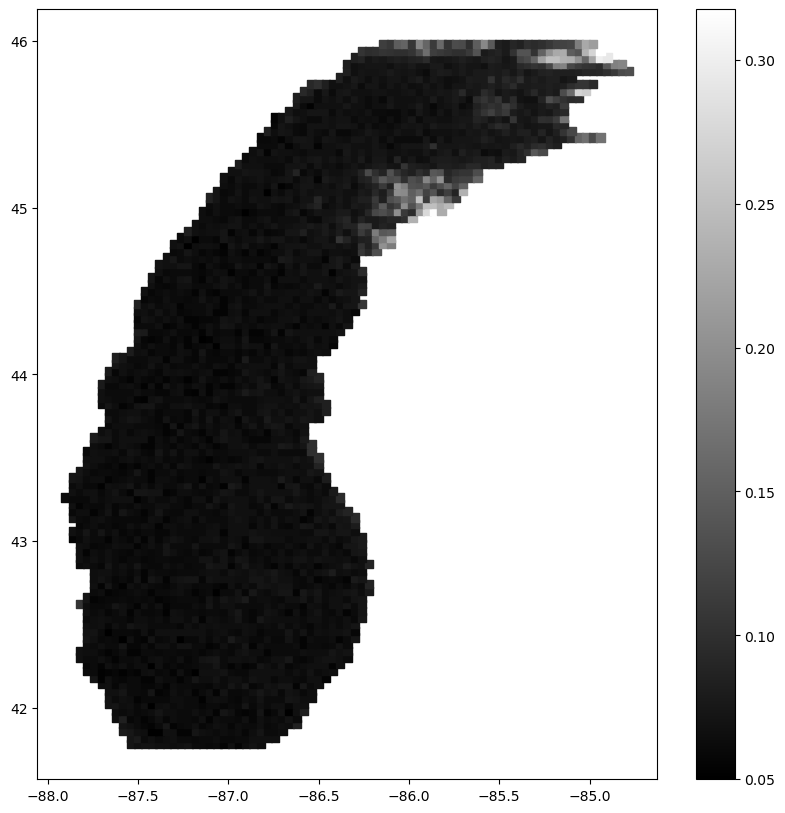

In [34]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')

# goes11.2008.11.03.1600

In [56]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-10
Time_UTC                                                             16:00
Date_CST                                                        2008-01-10
Time_CST                                                             16:00
File_name_for_1D_lake            goes11.2008.01.10.1600.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.10.1600.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.2375, 0.2325, 0.22749999, 0.255, 0.24749999...
Lake_data_2D             [array([       nan,        nan,        nan,   ...
Temp_F                                                                36.0
RH_pct                                                                58.0
Dewpt_F                                                               23.0
Wind_Spd_mph                                                             8
Wind_Direction_deg                                                      80
Peak_Wind_Gust_mph       

0

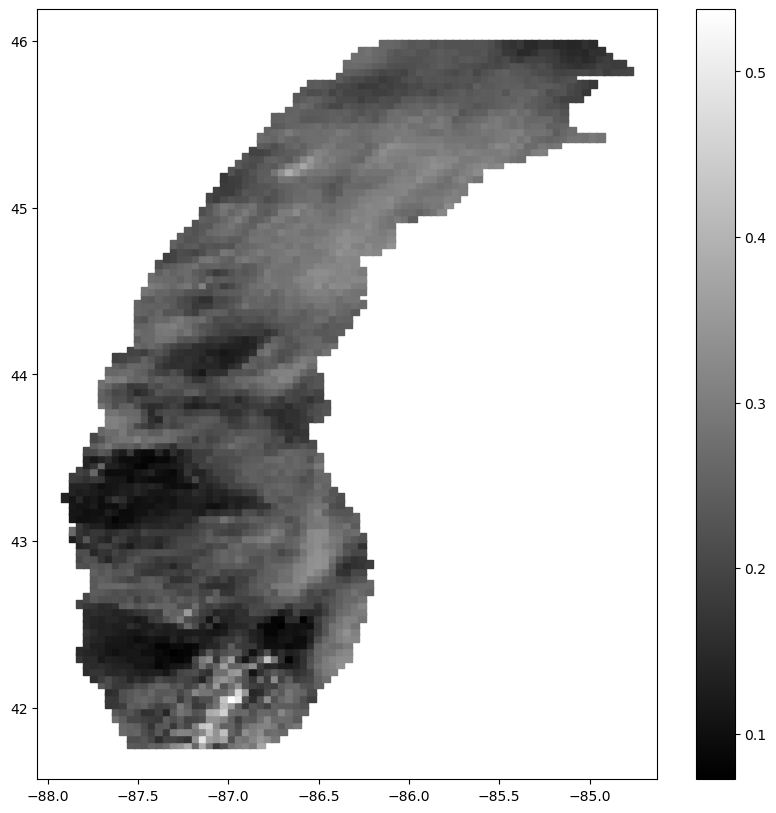

In [88]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample')

In [58]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [60]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

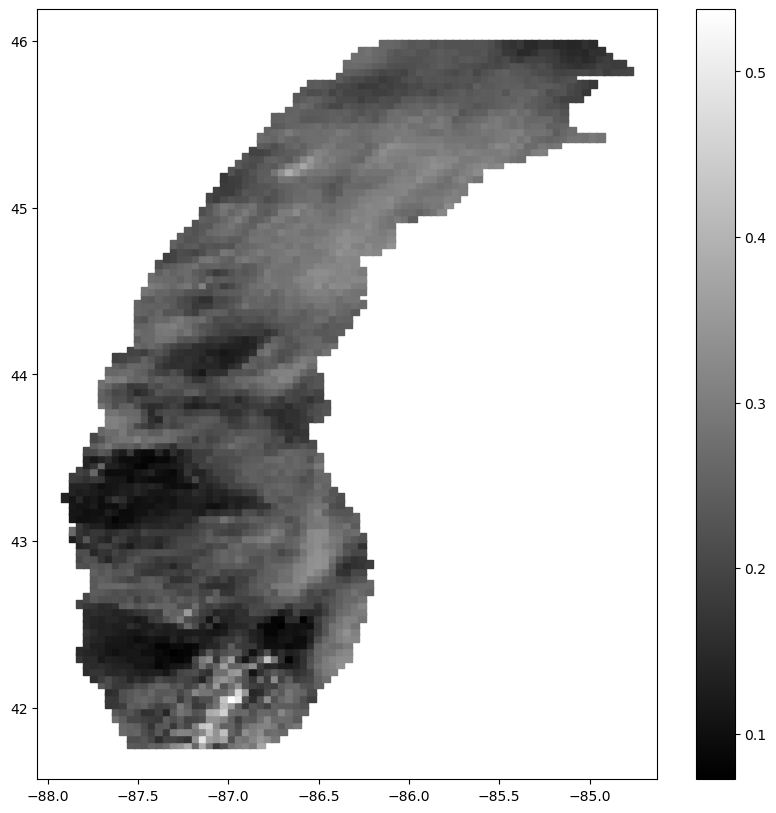

In [87]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample')

0

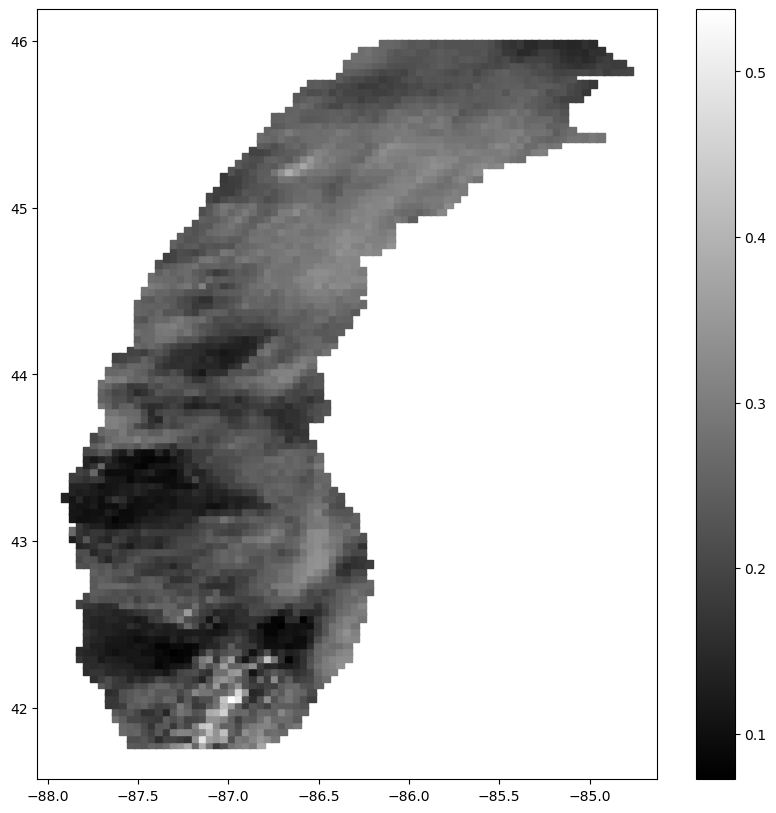

In [63]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][5177]), 
             'sample')

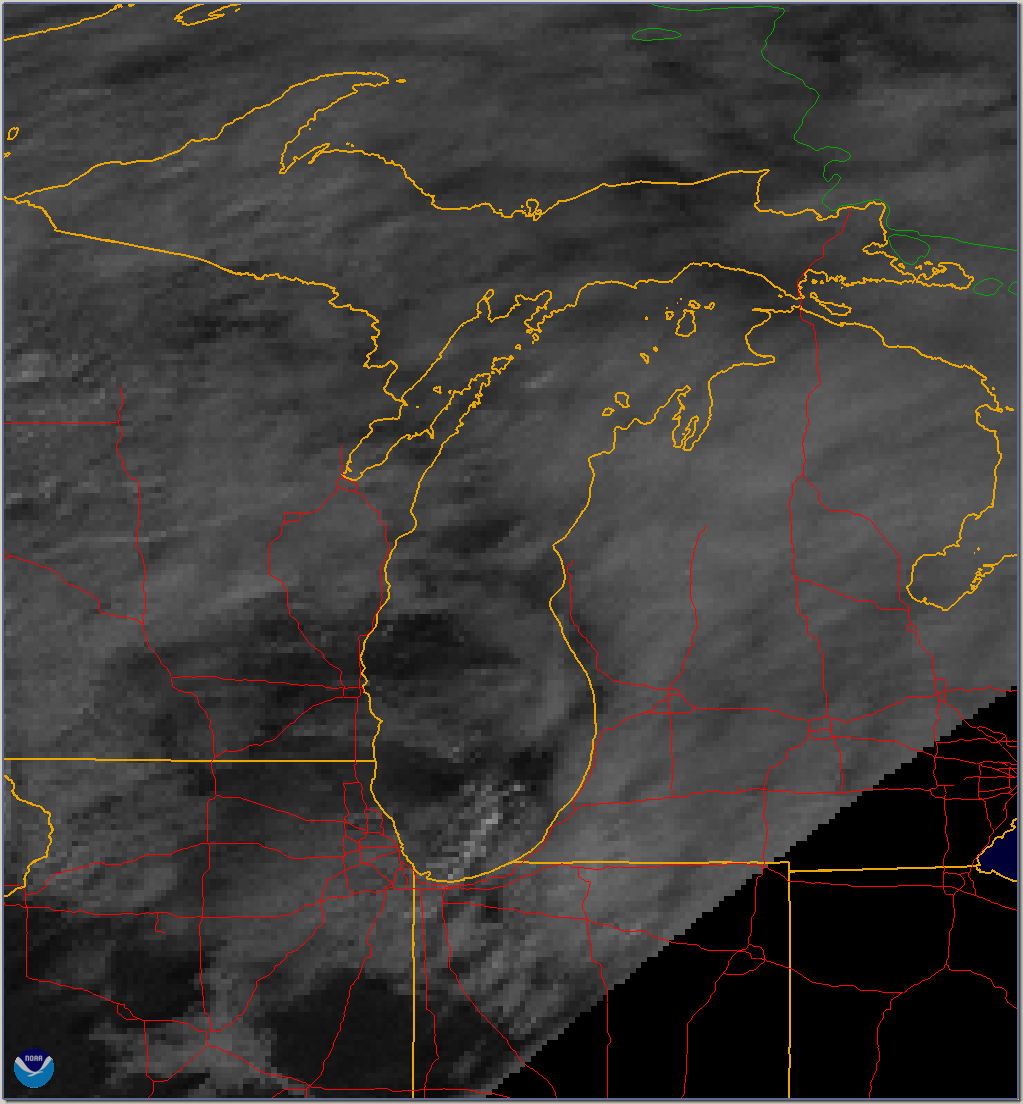

In [66]:
from IPython.display import Image
Image("D:/user/docs/NU/_Noctis/original-images/goes11.2008.01.10.1600.v01.nc.png")

Ok, this looks good.

# goes15.2016.12.11.1600

In [68]:
filtered_les.loc[10457]

Date_UTC                                                        2010-11-11
Time_UTC                                                             16:00
Date_CST                                                        2010-11-11
Time_CST                                                             16:00
File_name_for_1D_lake               goes13.2010.11.11.1600.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2010.11.11.1600.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                59.0
RH_pct                                                                64.0
Dewpt_F                                                               47.0
Wind_Spd_mph                                                             9
Wind_Direction_deg                                                     290
Peak_Wind_Gust_mph       

0

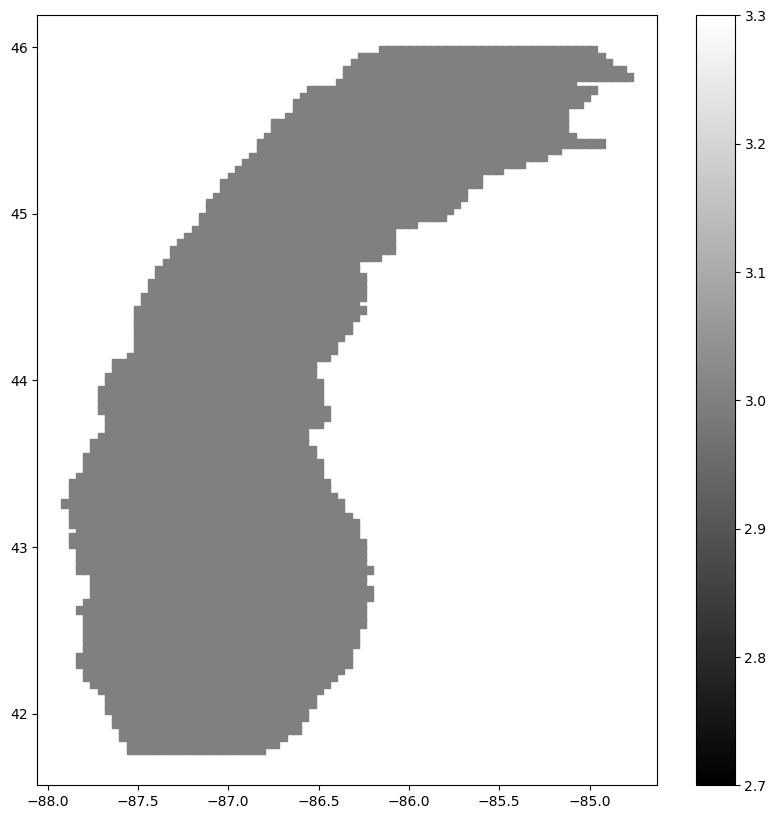

In [89]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][10457]), 
             'sample')

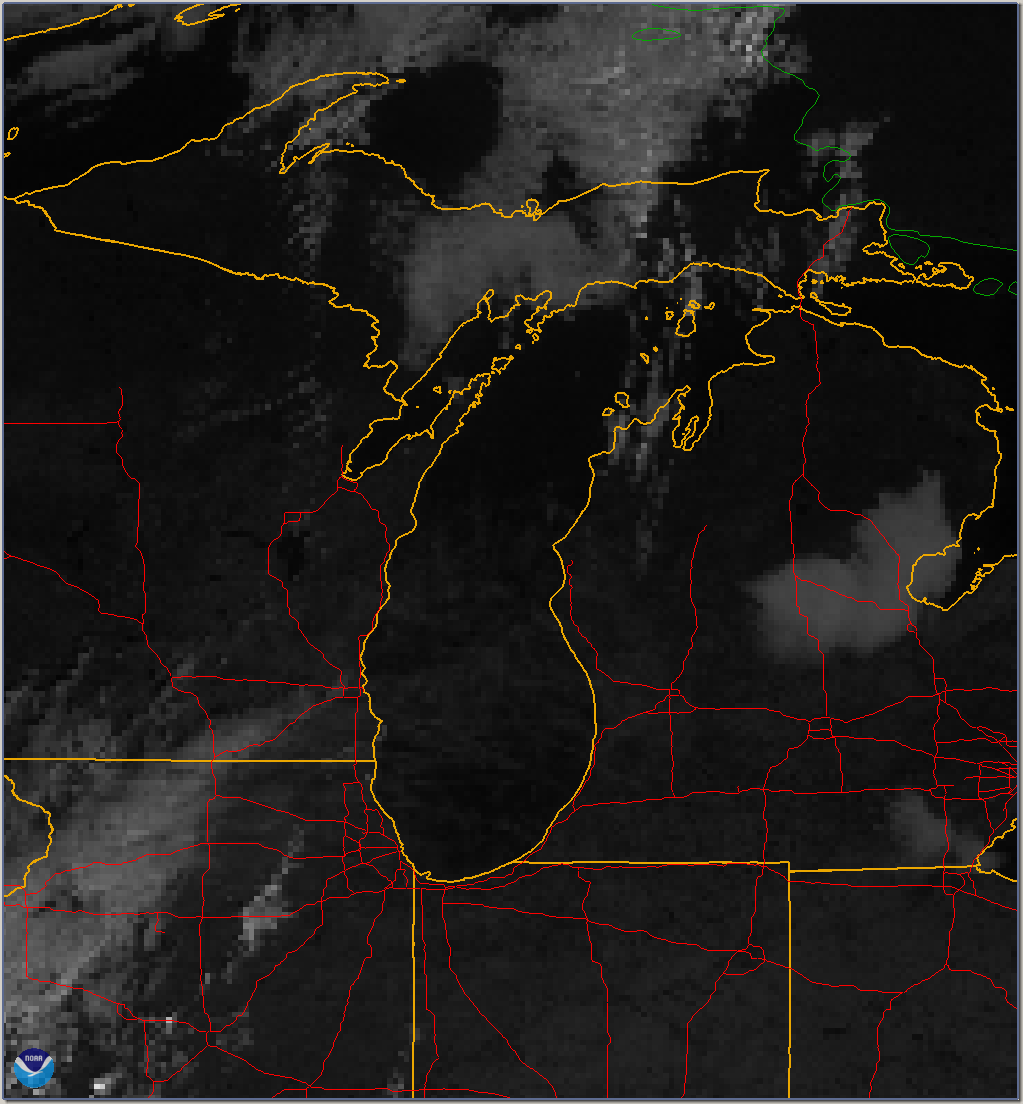

In [70]:
Image("D:/user/docs/NU/_Noctis/original-images/goes13.2010.11.11.1600.v01.nc.png")

Big discrepancy here... ***Please ingestigate***!

# goes15.2016.12.19.1600

In [72]:
filtered_les.loc[10649]

Date_UTC                                                        2010-12-05
Time_UTC                                                             16:00
Date_CST                                                        2010-12-05
Time_CST                                                             16:00
File_name_for_1D_lake               goes13.2010.12.05.1600.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2010.12.05.1600.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                28.0
RH_pct                                                                68.0
Dewpt_F                                                               19.0
Wind_Spd_mph                                                            16
Wind_Direction_deg                                                     310
Peak_Wind_Gust_mph       

0

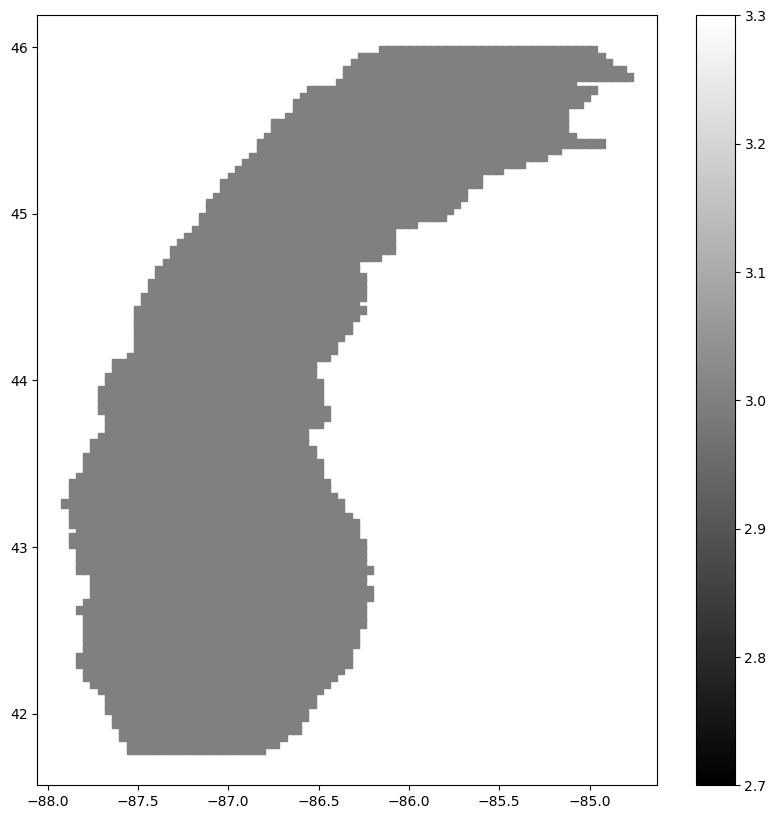

In [75]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][10649]), 
             'sample')

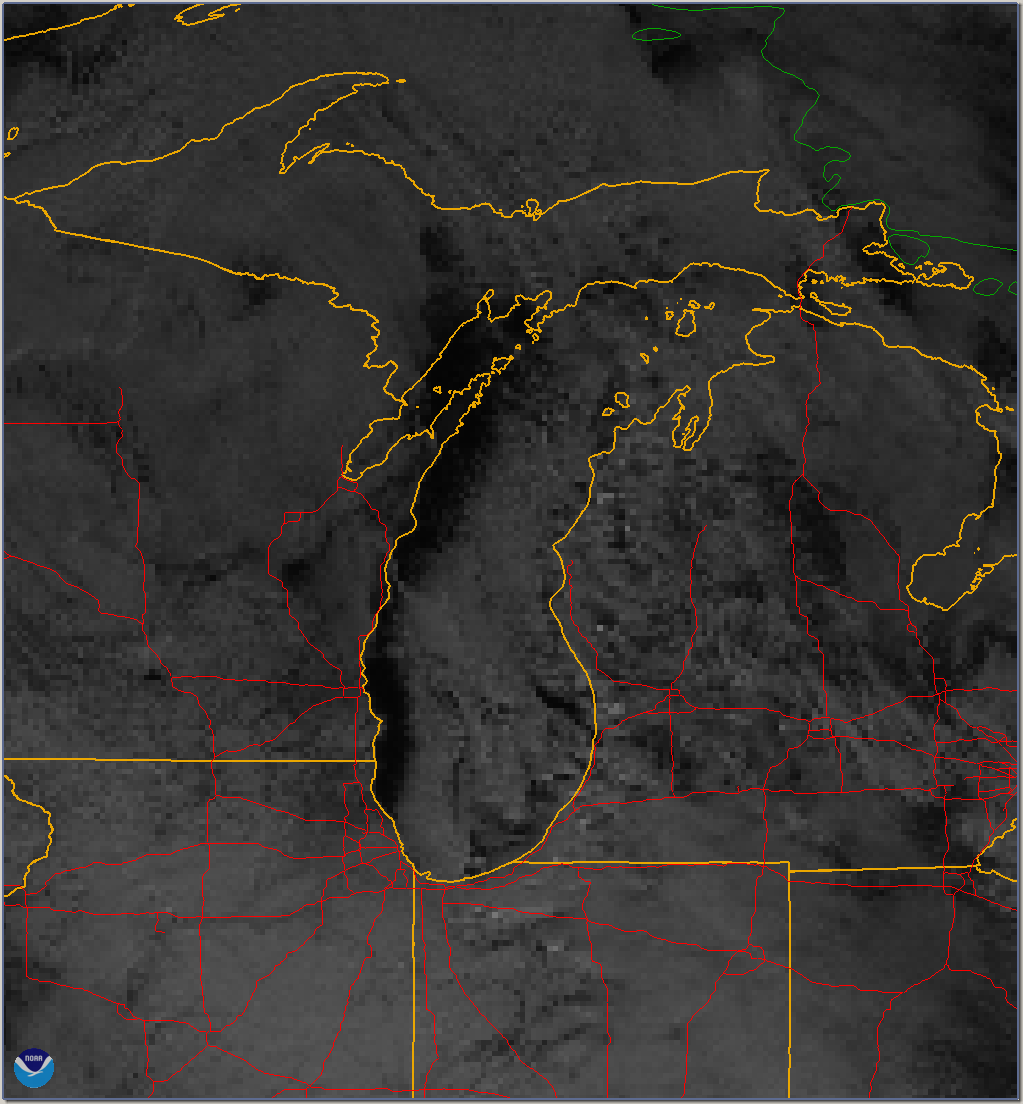

In [74]:
Image("D:/user/docs/NU/_Noctis/original-images/goes13.2010.12.05.1600.v01.nc.png")

Another snafu!!!

# Image generation
We will generate 64 $\times$ 64 images for each daytime Cloud frame.

The images are pretty large and take up a lot of memory and processing time for the network, so we resize them into 64 x 64 pixels. Then, we convert the images into grayscale and save them for training. 

The function below removes the colormap and axis, so that clean images can be stored to train the models:

In [76]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(f'D:/user/docs/NU/_Noctis/lake-michigan-images/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

A small test first:

In [77]:
for i, row in les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
        break

[0.012499999, 0.0075, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.01, 0.005, 0.01, 0.0075, 0.0075, 0.0175, 0.012499999, 0.012499999, 0.01, 0.012499999, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.012499999, 0.015, 0.0025, 0.01, 0.015, 0.0025, 0.012499999, 0.01, 0.015, 0.022499999, 0.012499999, 0.015, 0.0075, 0.0025, 0.02, 0.015, 0.0075, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.01, 0.0025, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.01, 0.0025, 0.005, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0175, 0.005, 0.012499999, 0.0075, 0.015, 0.012499999, 0.0075, 0.012499999, 0.012499999, 0.0075, 0.02, 0.0075, 0.01, 0.015, 0.0175, 0.012499999, 0.012499999, 0.0025, 0.0075, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.005, 0.015, 0.012499999, 0.012499999, 0.022499999, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.015, 0.012499999, 0.015, 0.015, 0.0

OK, this works. Let's read in the 1D column and serialize lake Michigan clouds:

In [78]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

100it [00:00, 4545.83it/s]


In [79]:
from tqdm import tqdm
for i, row in tqdm(filtered_les.iterrows()):

    try:
        #arr = np.array(eval(row.Lake_data_1D))
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row:", i)

15959it [42:03,  6.32it/s]


Interesting... Looking at the folder, images around image #12921 are very incomplete. Memory issue? Let
stry regenerating that image:

In [80]:
for i, row in tqdm(les.iterrows()):
    try:
        if 12921 == i:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, 'sample')
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:02, 16684.09it/s]


Yes, that worked! So, it is *likely* a this notebook's memory issue!

Looking at the containing folder, it looks like images from image #10127 to image #13046 are corrupt!

Let's regenerate these in a separate folder:

In [81]:
def arrays_2_png_data_regen(lat, lon, val, fig_name, folder_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(folder_name + '/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

In [82]:
for i, row in tqdm(les.iterrows()):
    try:
        if 10127 <= i <= 13046:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, str(i), "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [07:59, 99.77it/s]   


Examining the regeneration folder, most of the images look suspiciously like brown noise. For example, image #12969. Let's regenerate that one to verify:

In [83]:
for i, row in tqdm(les.iterrows()):
    try:
        if i == 12969:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, 'sample', "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:01, 35208.51it/s]


Yup, `sample` looks exactly lime image #12969 in the regenerating folder. 

Note the missing filename and missing data:

In [84]:
filtered_les.loc[12969]

Date_UTC                                                        2012-03-22
Time_UTC                                                             16:00
Date_CST                                                        2012-03-22
Time_CST                                                             16:00
File_name_for_1D_lake                                                 None
File_name_for_2D_lake                                                 None
Lake_data_1D             [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Lake_data_2D                                                         [nan]
Temp_F                                                                75.0
RH_pct                                                                51.0
Dewpt_F                                                               56.0
Wind_Spd_mph                                                            10
Wind_Direction_deg                                                     100
Peak_Wind_Gust_mph       

In [85]:
filtered_les['Lake_data_1D'][12969]

'[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

So, appears to be a missing data issue?

When `File_name_for_1D_lake == None`, that means there is no image data, but we keep the meteo data.

So let's use this band of missing data as the separation between the training set and the validation set!

Note to myself: IN order to always ensure that data is not corrupt:

- For *each meteo city*, produce a combined csv just like Traverse City.

- Then, run logic that goes over *every row* and verifies that the image filename is not null *and* that the 1D data is not made out of a majority of nans.

- Then, randomly select 100 rows over the entire dataset and produce a 100-row 2-column image collection that plots lake Michigan cloud cover on the right and the original satellite image on the right.

We need to be able to scan all 100 images and verify that the cloud covers match.

I copy contents of folder `D:\user\docs\NU\_Noctis\lake-michigan-images-regen` into folder `D:\user\docs\NU\_Noctis\lake-michigan-images`.

# Removing the 255-level padding around Lake Michigan
We need to do this *before* we resize the images to 64 $\times$ 64, otherwise we will get artificial aliasing around the lake MIchigan coastline, which will look like spurious Cloud intensity around the coastline!

We know that image #39 is corrupt: all black. It should give us the shape of Lake Michigan!

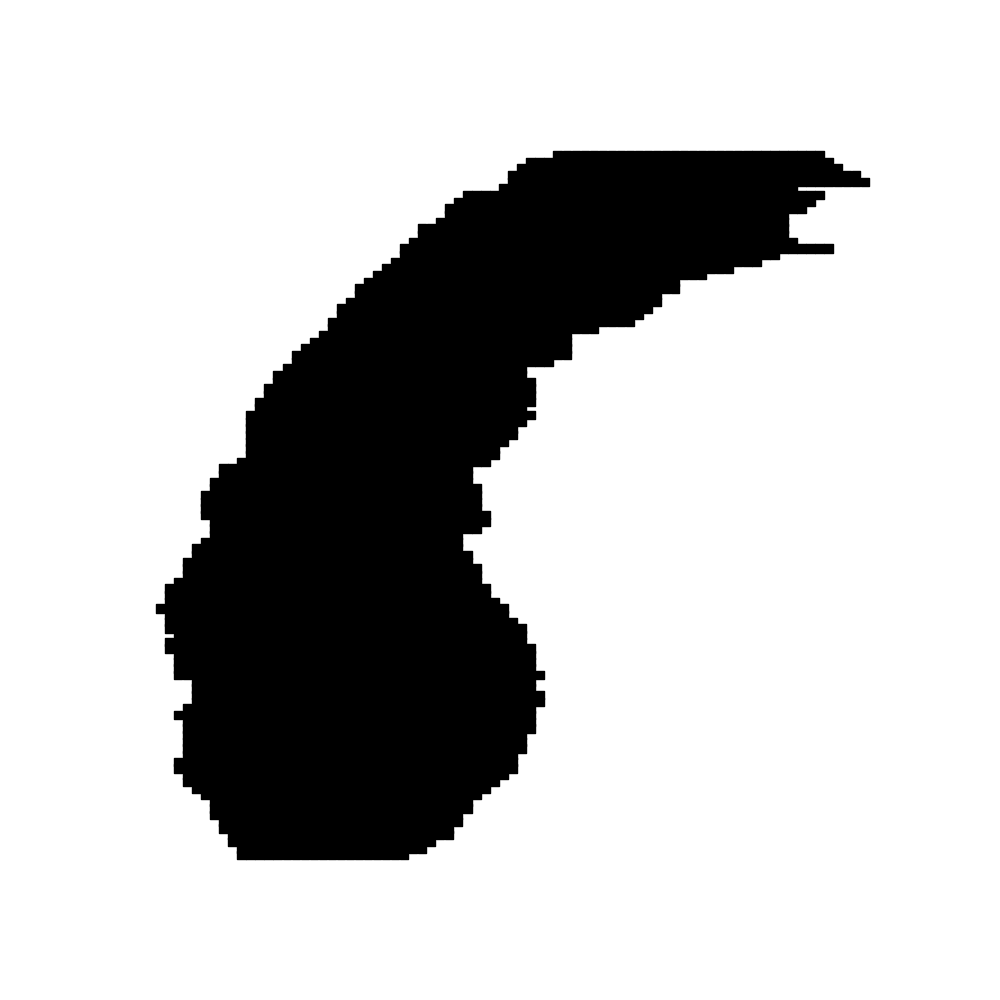

In [192]:
from PIL import Image, ImageOps

img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/39.png')
img

Let's create a mask that is all ones *over* lake Michigan, and all zeros over land:

In [193]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

In [194]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

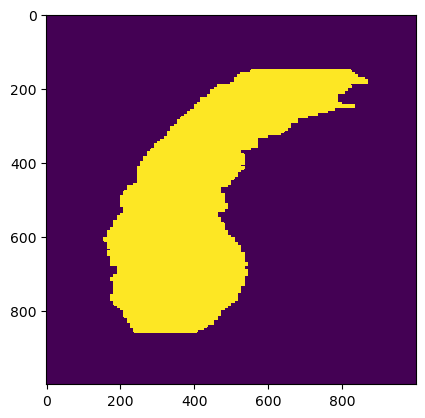

In [211]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

Now let's see what Image #6 should really look like, without the spurious full-intensity over land:

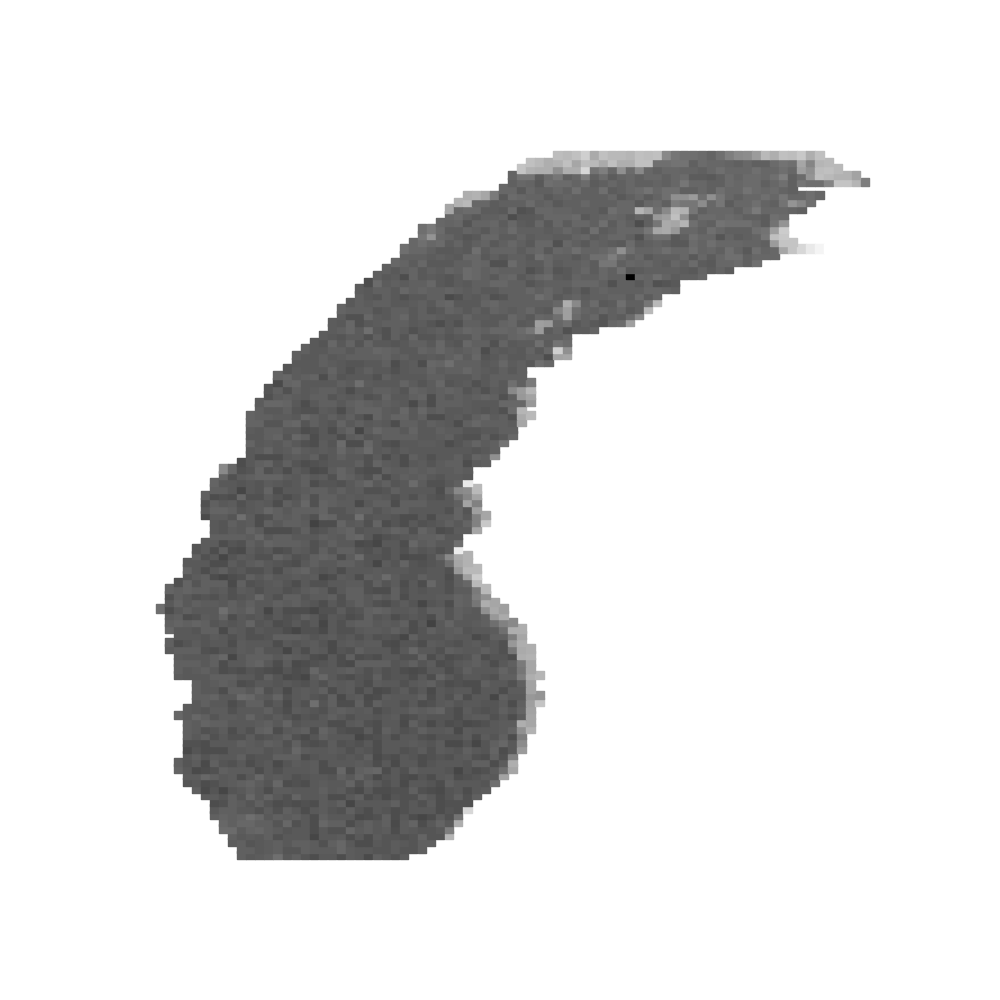

In [207]:
img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/6.png')
img = ImageOps.grayscale(img)
img

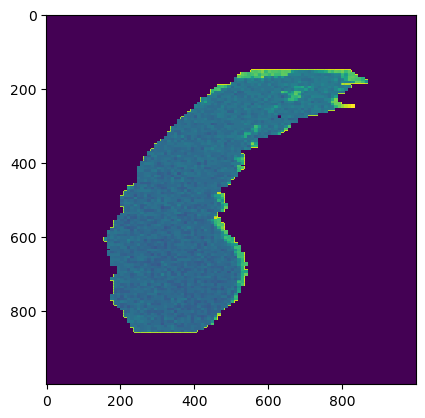

In [212]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')
plt.show()

In [199]:
(newimg)[150, 553], (newimg)[860, 408]

(245, 231)

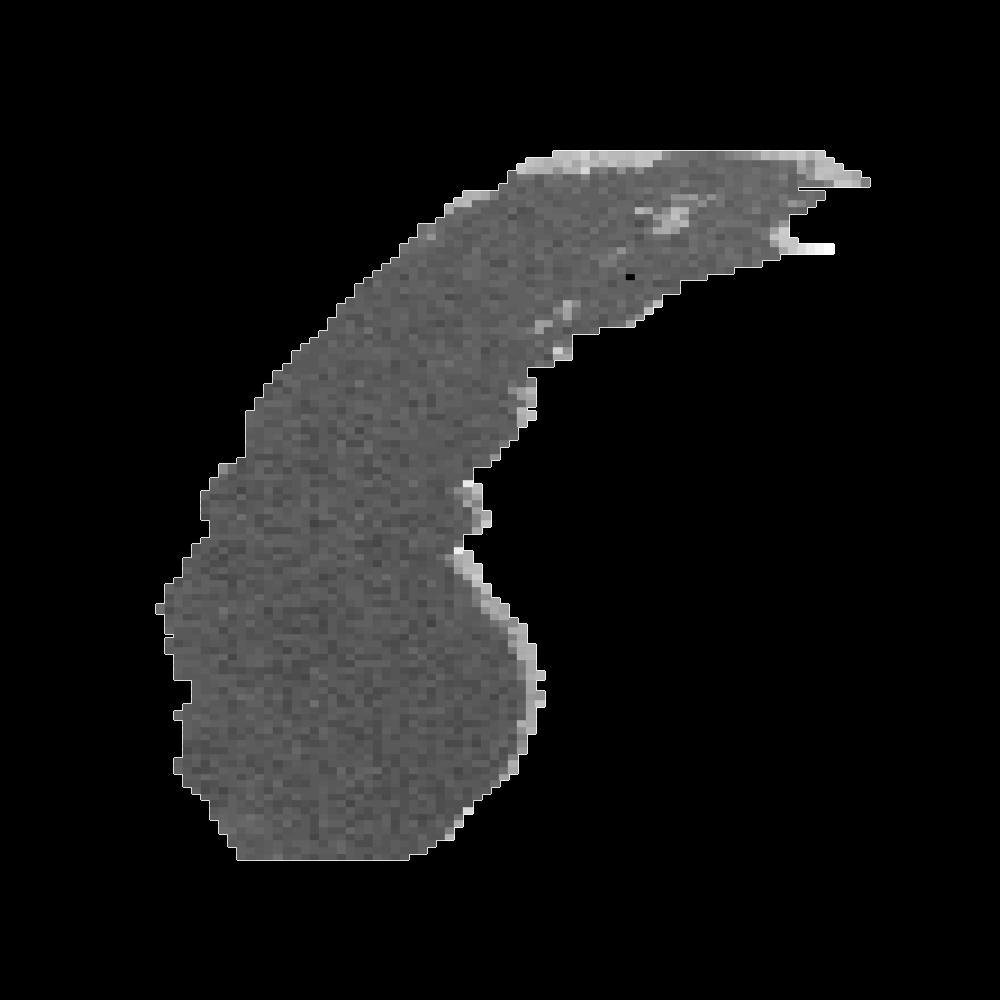

In [219]:
ImageOps.grayscale(Image.fromarray(newimg))

And this is how we save the image above:

In [220]:
ImageOps.grayscale(Image.fromarray(newimg)).save('D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png')

To combine all ops:

In [222]:
f_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/6.png'
g_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png'
img = Image.open(f_img)
img = ImageOps.grayscale(img)
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64))
newimg64.save(g_img)

So now let's repeat these operations *prior* to compressing to 64 $\times$ 64:

# Shrinking to 64 $\times$ 64
We now resize images to 64 $\times$ 64 in order to reduce network training memory requirements, with zero intensities on land and avoiding aliasing around the lake border:

In [224]:
from PIL import Image, ImageOps
f = 'D:/user/docs/NU/_Noctis/lake-michigan-images'
g = 'D:/user/docs/NU/_Noctis/lake-michigan-images-64'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
    newimg64.save(g_img)

  0%|          | 0/15960 [00:00<?, ?it/s]C:\Users\Dino\AppData\Local\Temp\ipykernel_6780\778164306.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
100%|█████████▉| 15959/15960 [03:32<00:00, 75.08it/s]


ValueError: operands could not be broadcast together with shapes (64,64) (1000,1000) 

I think there's still aliasing on the coastline compared to the original images, but I think this is about the best we can get.

# 4. Feature engineering: Snowfall
Adding a new column for snowfall

In [91]:
filtered_les.loc[(filtered_les['Temp_F'] <= 32) & (filtered_les['Precip_in'] > 0), 'LES_Snowfall'] = 1
filtered_les.loc[(filtered_les['Temp_F'] > 32) | (filtered_les['Precip_in'] <= 0), 'LES_Snowfall'] = 0
filtered_les

Date_UTC Time_UTC    Date_CST Time_CST  \
0      2006-10-01    14:00  2006-10-01    14:00   
1      2006-10-01    15:00  2006-10-01    15:00   
2      2006-10-01    16:00  2006-10-01    16:00   
3      2006-10-01    17:00  2006-10-01    17:00   
4      2006-10-01    18:00  2006-10-01    18:00   
...           ...      ...         ...      ...   
15954  2015-03-31    17:00  2015-03-31    17:00   
15955  2015-03-31    18:00  2015-03-31    18:00   
15956  2015-03-31    19:00  2015-03-31    19:00   
15957  2015-03-31    20:00  2015-03-31    20:00   
15958  2015-03-31    21:00  2015-03-31    21:00   

                           File_name_for_1D_lake  \
0      goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1      goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2      goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3      goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4      goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
15954  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
15955  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
15956  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
15957  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
15958  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
0      T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1      T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2      T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3      T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4      T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
15954  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
15955  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
15956  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
15957  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
15958  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
0      [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1      [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2      [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3      [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4      [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
15954  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
15955  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
15956  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
15957  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
15958  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  ...  \
0      [array([       nan,        nan,        nan,   ...    60.0    49.0  ...   
1      [array([       nan,        nan,        nan,   ...    60.0    47.0  ...   
2      [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0  ...   
3      [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0  ...   
4      [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0  ...   
...                                                  ...     ...     ...  ...   
15954  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0  ...   
15955  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0  ...   
15956  [array([       nan,        nan,        nan,   ...    37.0    66.0  ...   
15957  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0  ...   
15958  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0  ...   

       Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  High_Cloud_Ht_ft  \
0                       0             3600                0                 0   
1                       0                0                0                 0   
2                       0                0                0                 0   
3                       0                0              

We now begin dropping dates in preparation for training:

In [92]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  Dewpt_F  \
0  [array([       nan,        nan,        nan,   ...    60.0    49.0     41.0   
1  [array([       nan,        nan,        nan,   ...    60.0    47.0     40.0   
2  [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0     43.0   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0     46.0   
4  [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0     45.0   

   Wind_Spd_mph  Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
0            10                 270                   0             3600   
1             3                   0                   0                0   
2             6                  40                   0                0   
3             0                   0                   0                0   
4             0                   0                   0             8000   

   Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
0                0                 0             10          994.7   
1                0                 0             10          994.7   
2                0                 0             10          994.7   
3                0                 0             10          994.7   
4                0                 0             10          994.7   

   Sea_Lev_Press_hPa  Altimeter_hPa  Precip_in  LES_Snowfall  
0             1017.8         1017.6        0.0           0.0  
1             1017.7         1017.6        0.0           0.0  
2             1017.8         1017.6        0.0           0.0  
3             1017.8         1017.6        0.0           0.0  
4             1017.9         1017.6        0.0           0.0

In [93]:
# Summary
filtered_les.describe()

Temp_F        RH_pct       Dewpt_F  Wind_Spd_mph  \
count  15959.000000  15959.000000  15959.000000  15959.000000   
mean      34.931261     68.740335     25.234351      7.137039   
std       14.344283     14.927241     13.538403      5.093937   
min      -15.000000      0.000000    -20.000000      0.000000   
25%       25.000000     59.000000     16.000000      3.000000   
50%       34.000000     70.000000     25.000000      7.000000   
75%       44.000000     80.000000     34.000000     10.000000   
max       88.000000    100.000000     66.000000     34.000000   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
count        15959.000000        15959.000000     15959.000000   
mean           158.714832            4.500971      4563.800363   
std            128.081797            9.510925      5747.505620   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000      1500.000000   
50%            190.000000            0.000000      2700.000000   
75%            270.000000            0.000000      4500.000000   
max            360.000000           52.000000     28000.000000   

       Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
count     15959.000000      15959.000000   15959.000000   15959.000000   
mean       3457.098816       1033.362993       8.174698     990.931687   
std        6318.061684       3981.234855       3.033164      41.719389   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          0.000000       7.000000     987.000000   
50%           0.000000          0.000000      10.000000     993.300000   
75%        4000.000000          0.000000      10.000000     999.000000   
max       25000.000000      26000.000000      10.000000    1018.900000   

       Sea_Lev_Press_hPa  Altimeter_hPa     Precip_in  LES_Snowfall  
count       15959.000000   15959.000000  15959.000000  15959.000000  
mean          960.019663    1014.892355      0.002377      0.022057  
std           232.924553      26.926521      0.016545      0.146872  
min             0.000000       0.000000      0.000000      0.000000  
25%          1009.500000    1009.800000      0.000000      0.000000  
50%          1016.400000    1016.300000      0.000000      0.000000  
75%          1022.500000    1022.000000      0.000000      0.000000  
max          1043.600000    1042.300000      0.860000      1.000000

In [94]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  15959
Total number of features:  19


In [151]:
filtered_les.LES_Snowfall.value_counts()

0.0    15607
1.0      352
Name: LES_Snowfall, dtype: int64

# Optional: Limiting

# 5. Correlations
Plotting the pearson correlation plot to visualise the correlation between various features

Text(0.5, 1.0, 'Correlation Matrix')

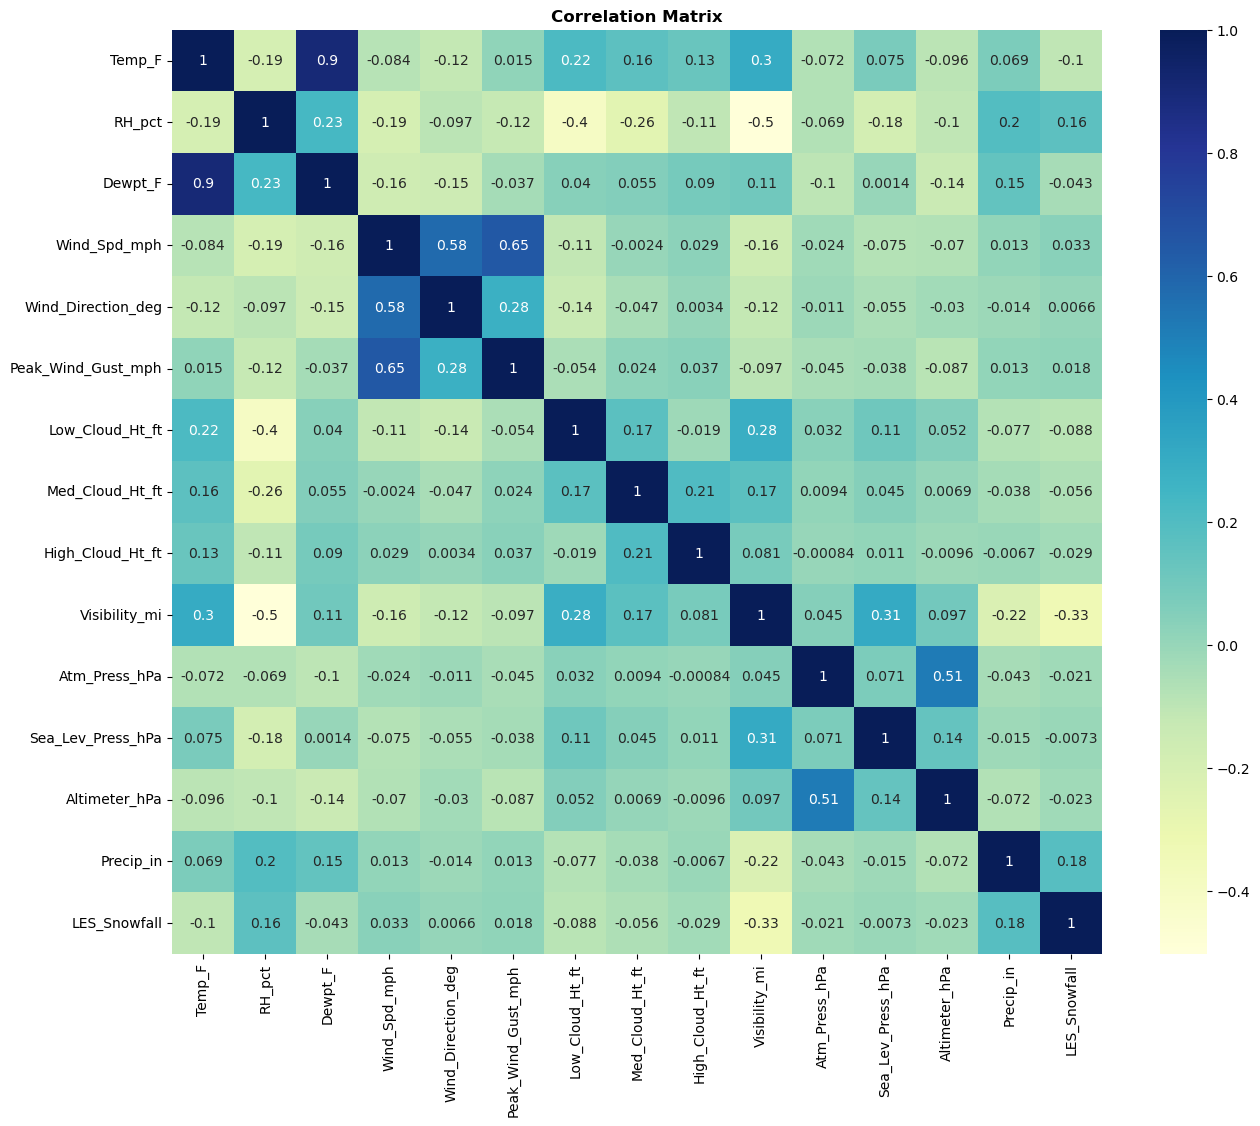

In [95]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other
- We remove the ones that have shown `positive correlation` greater than 0.6
    - **Temp_F** is highly correlated with **Dewpt_F**
    - **Wind_Spd_mph** is highly correlated with **Peak_Wind_Gust_mph**
- We also note some strong `negative correlation`, but all of them are greater than -0.6, hence we do not drop those features

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

In [96]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  15959
Total number of features:  17


File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  \
0  [array([       nan,        nan,        nan,   ...    60.0    49.0   
1  [array([       nan,        nan,        nan,   ...    60.0    47.0   
2  [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0   
4  [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0   

   Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0            10                 270             3600                0   
1             3                   0                0                0   
2             6                  40                0                0   
3             0                   0                0                0   
4             0                   0             8000                0   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                 0             10          994.7             1017.8   
1                 0             10          994.7             1017.7   
2                 0             10          994.7             1017.8   
3                 0             10          994.7             1017.8   
4                 0             10          994.7             1017.9   

   Altimeter_hPa  Precip_in  LES_Snowfall  
0         1017.6        0.0           0.0  
1         1017.6        0.0           0.0  
2         1017.6        0.0           0.0  
3         1017.6        0.0           0.0  
4         1017.6        0.0           0.0

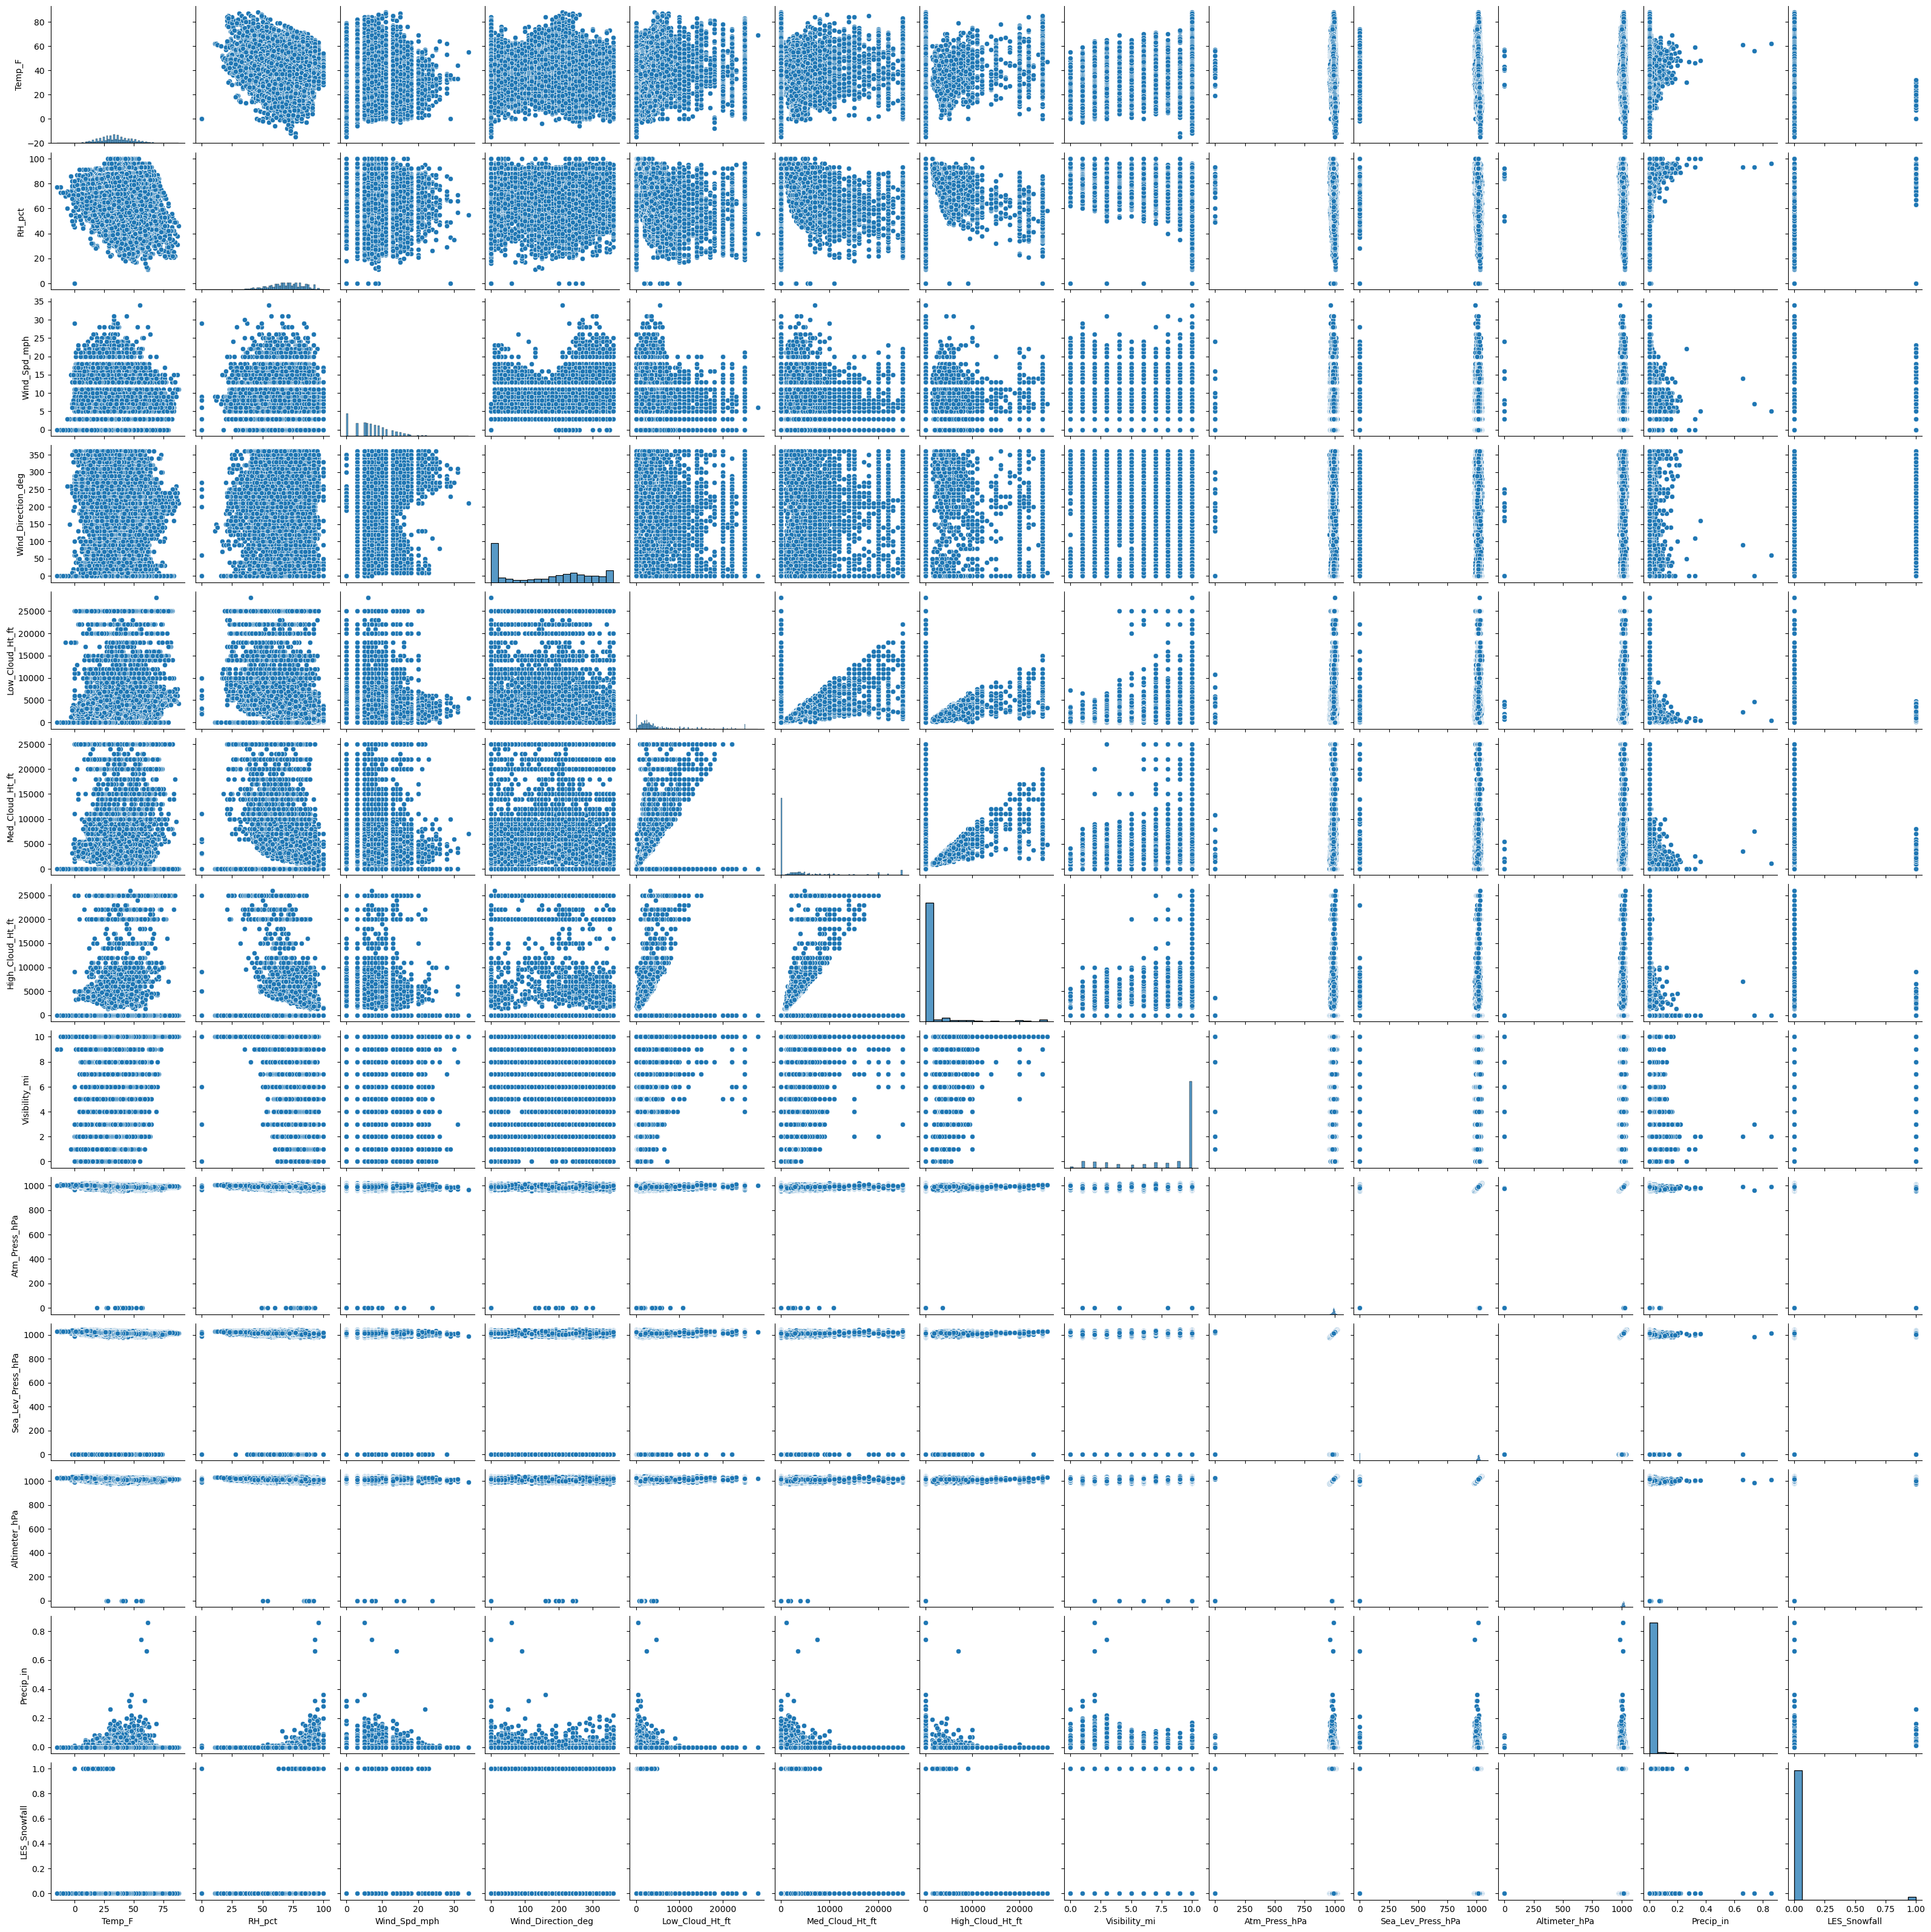

In [154]:
sns.pairplot(filtered_les)

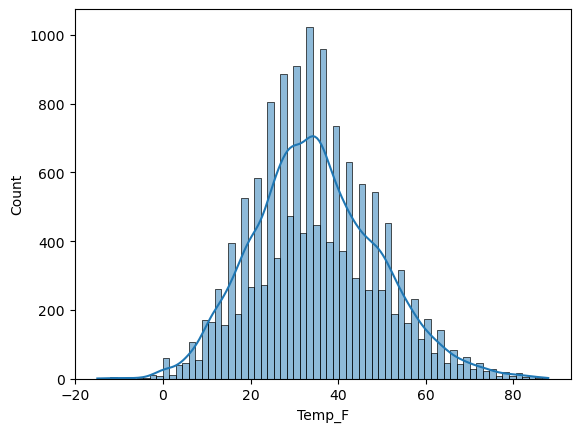

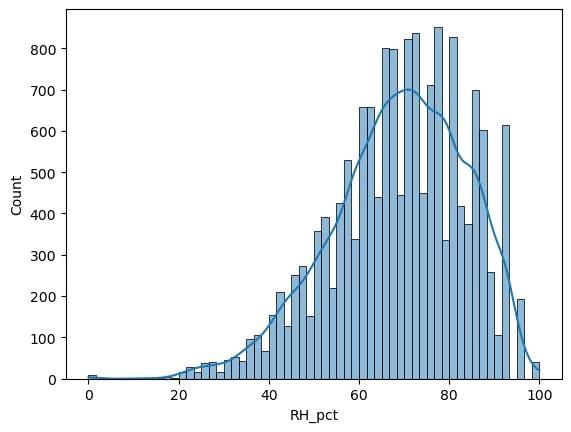

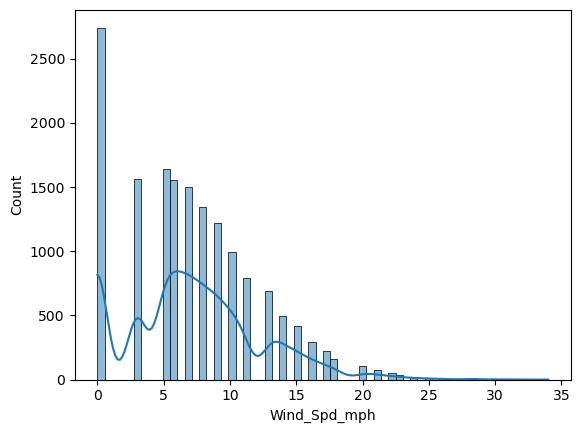

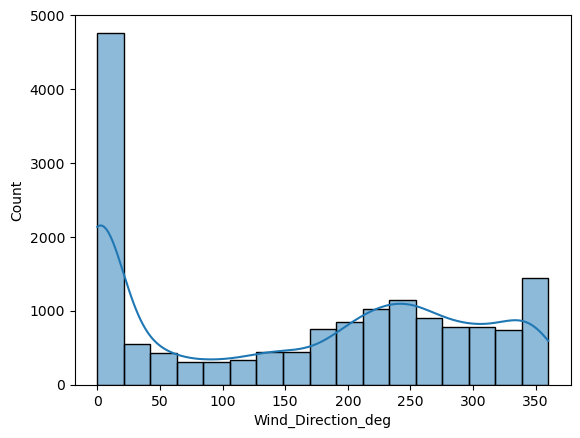

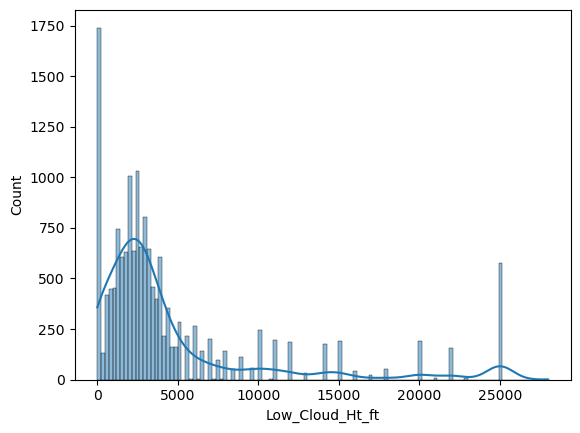

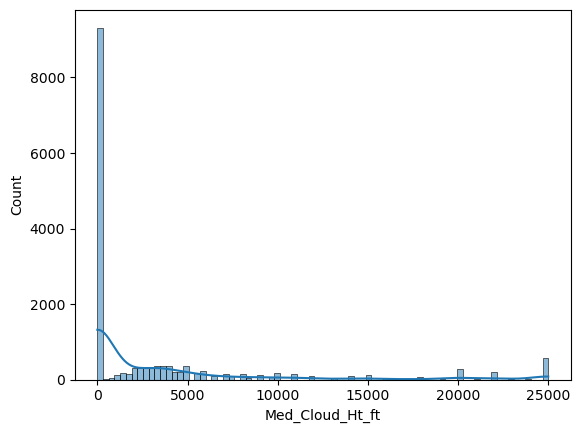

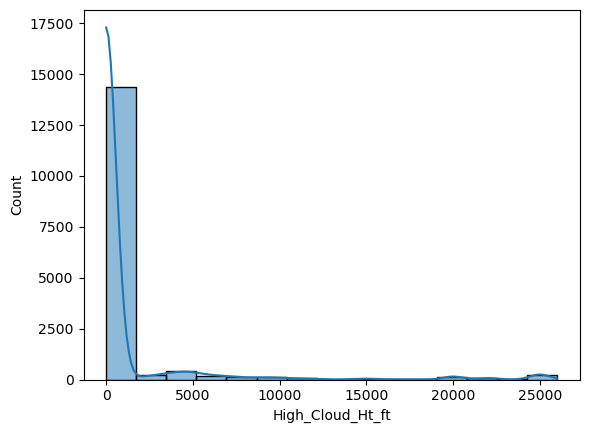

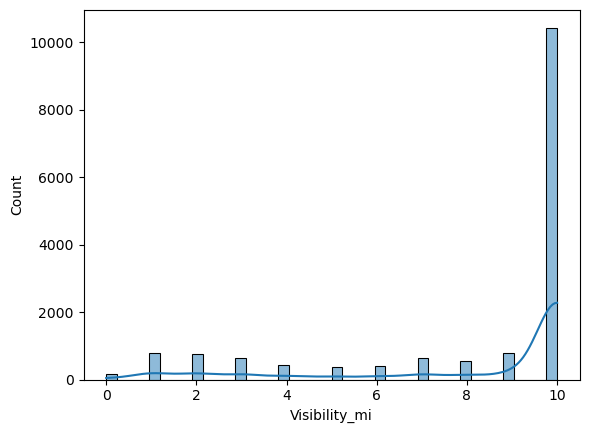

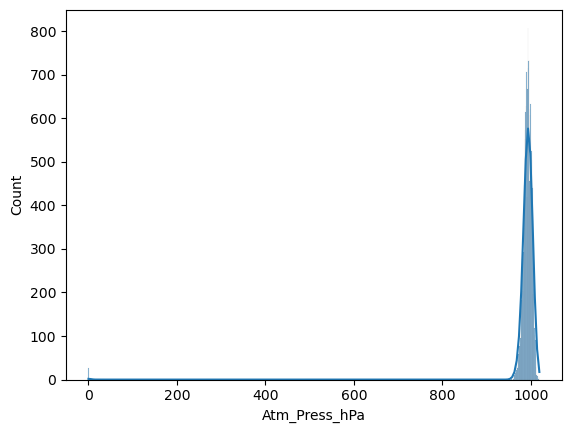

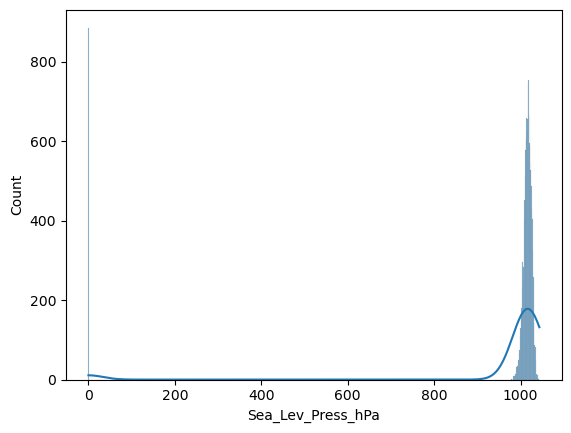

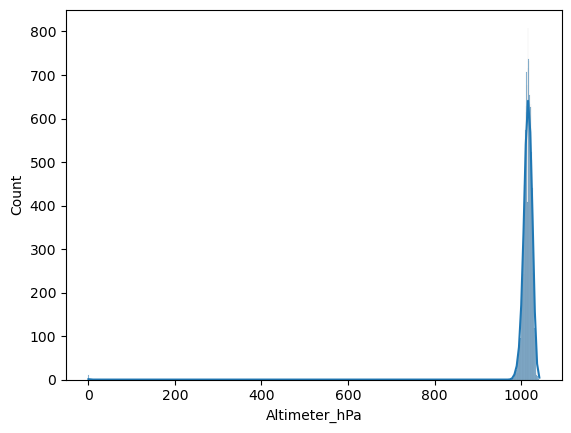

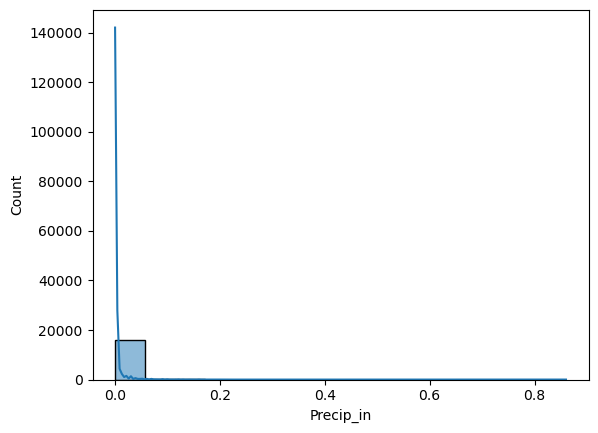

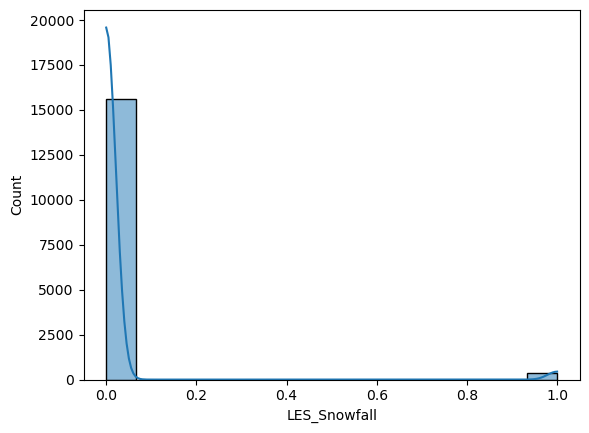

In [155]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(filtered_les)

In [97]:
filtered_les['LES_Snowfall'].value_counts()

0.0    15607
1.0      352
Name: LES_Snowfall, dtype: int64

<AxesSubplot:xlabel='LES_Snowfall', ylabel='count'>

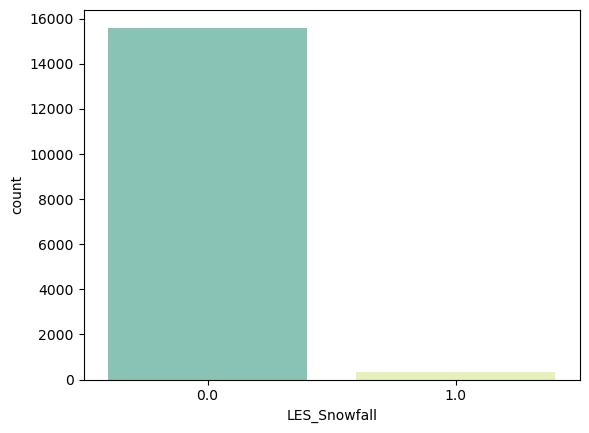

In [98]:
sns.countplot(x = filtered_les['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

# 6. Feature engineering: Precipitation

In [99]:
filtered_les["Precip_in"].value_counts()

0.00    14827
0.01      509
0.02      195
0.03      142
0.04       69
0.05       48
0.06       31
0.07       31
0.09       19
0.08       16
0.10       14
0.12       10
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: Precip_in, dtype: int64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

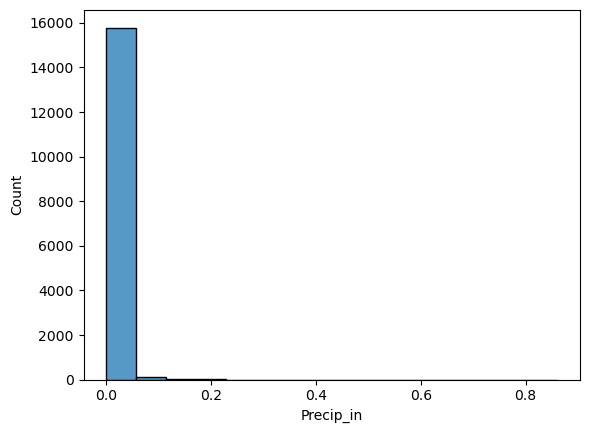

In [100]:
sns.histplot(filtered_les["Precip_in"])

In [101]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

78       0.01
79       0.01
80       0.03
81       0.02
83       0.03
         ... 
15935    0.04
15936    0.01
15938    0.01
15939    0.01
15940    0.02
Name: Precip_in, Length: 1132, dtype: float64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

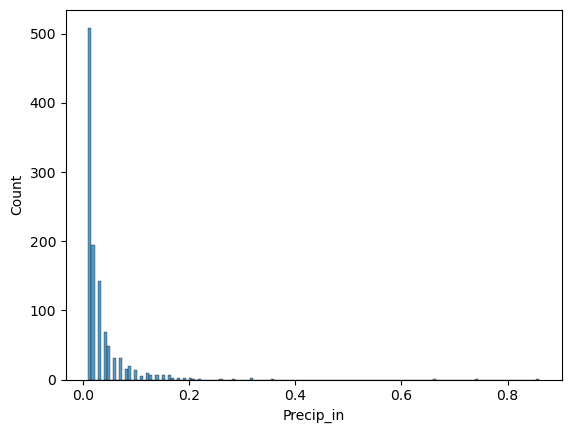

In [102]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

Adding a new column for precipitation:

In [103]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

File_name_for_1D_lake  \
0      goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1      goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2      goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3      goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4      goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
15954  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
15955  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
15956  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
15957  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
15958  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
0      T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1      T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2      T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3      T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4      T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
15954  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
15955  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
15956  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
15957  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
15958  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
0      [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1      [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2      [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3      [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4      [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
15954  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
15955  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
15956  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
15957  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
15958  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  \
0      [array([       nan,        nan,        nan,   ...    60.0    49.0   
1      [array([       nan,        nan,        nan,   ...    60.0    47.0   
2      [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0   
3      [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0   
4      [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0   
...                                                  ...     ...     ...   
15954  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0   
15955  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0   
15956  [array([       nan,        nan,        nan,   ...    37.0    66.0   
15957  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0   
15958  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0   

       Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                10                 270             3600                0   
1                 3                   0                0                0   
2                 6                  40                0                0   
3                 0                   0                0                0   
4                 0                   0             8000                0   
...             ...                 ...              ...              ...   
15954             5                  20             7000            10000   
15955             3                 330             5500             7000   
15956            11                 310             3500             5500   
15957             0                   0             2100             2900   
15958             0                   0             4600                0   

       High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                     0             10          994.7             1017

<AxesSubplot:xlabel='LES_Precipitation', ylabel='count'>

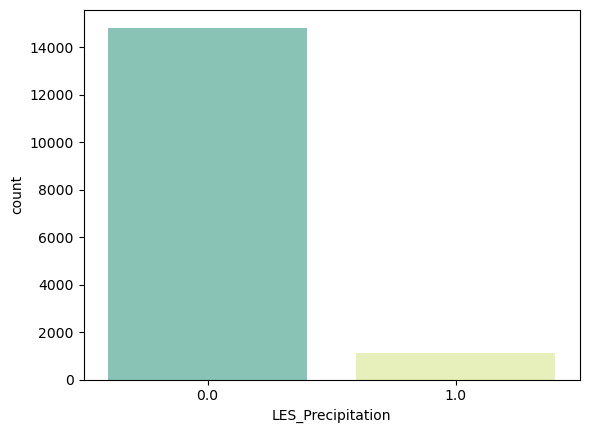

In [104]:
sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

# 7. Predicting Cloud patterns with a stride of 1
This means we are going to live with the nighttime discontinuity in imagery.

First, load all 64 $\times$ 64 images, with cropping of an 8-pixel border all around the lake:

In [225]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(15959)):
    # im shape -> (64, 64)
    im = cv2.imread('D:/user/docs/NU/_Noctis/lake-michigan-images-64/' + str(idx) + '.png')
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████| 15959/15959 [00:32<00:00, 492.98it/s]


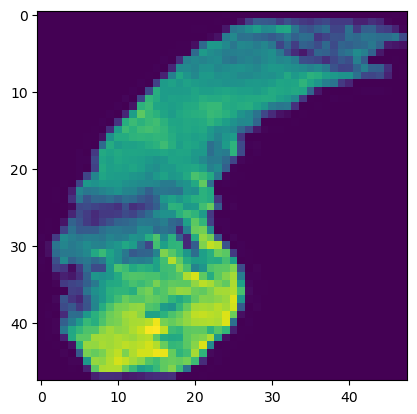

In [226]:
plt.imshow(images[146]) 

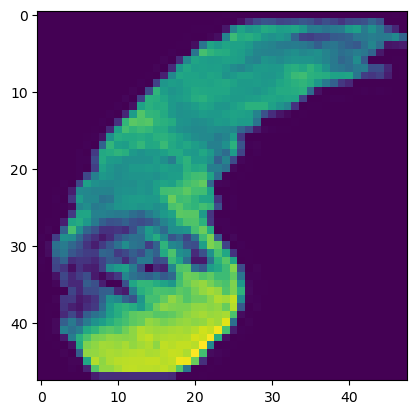

In [227]:
plt.imshow(images[147])

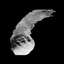

In [228]:
from PIL import Image, ImageOps
Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images-64/147.png')

In [152]:
full = np.full(im.shape, 255)
mask = (full - img).astype(np.uint8)
mask = (0 < mask).astype(int)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Cloud Sequence Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.

>**Note**: Do not run the next cell because it shows an example that includes corrupt images (ones with just nans):

Displaying next frames starting at image 11491.


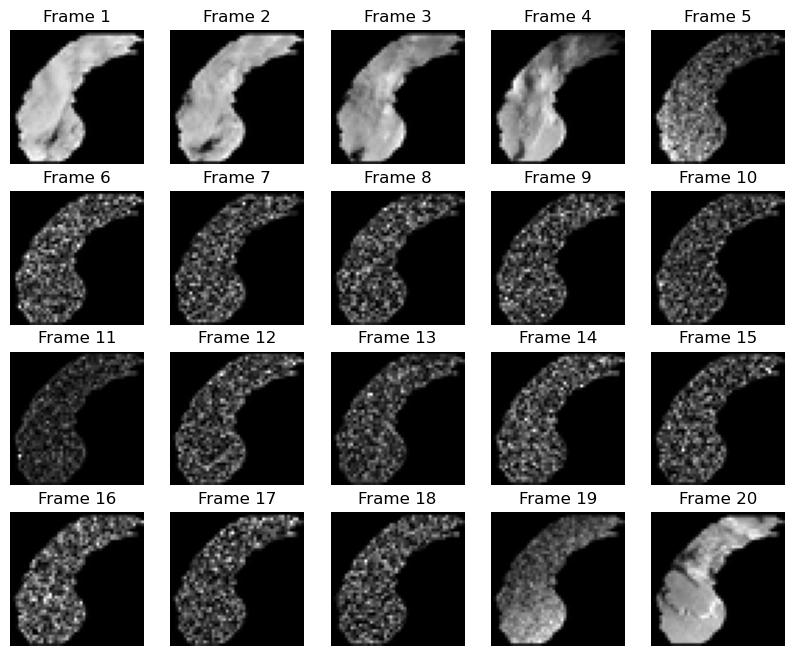

In [230]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

Run this one instead, whcih displays a valid sequence of images:

Displaying next frames starting at image 4446.


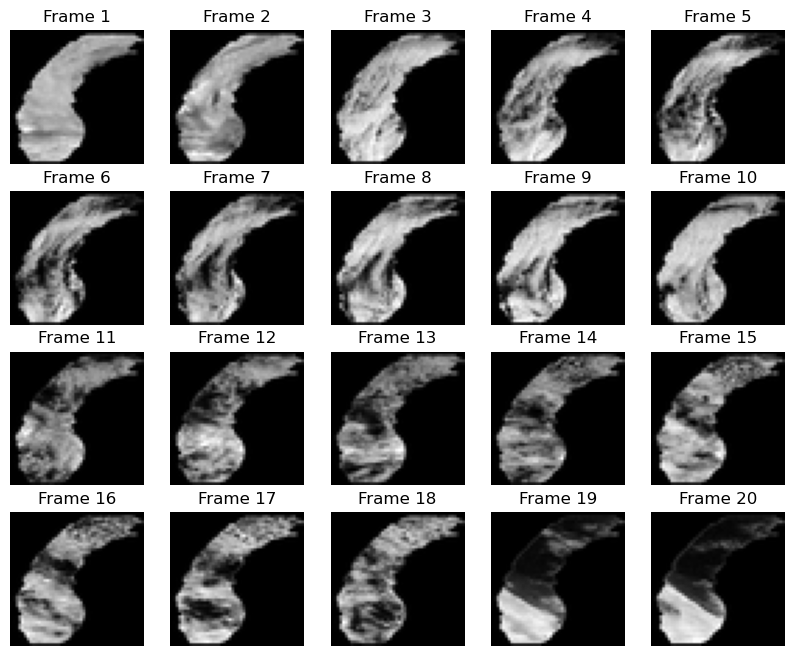

In [231]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

Since daytime only consists of 7 hours, this image sequence of length 20 obligatorily includes nighttimes. In other words, there is an image above that jumps over nighttime and thus is more discontinuous in cloud cover.

20 images is about 3 days (3 $\times$ 7). 

As an exercise, let's see if based on 6 hours of cloud cover, we can predict the 7th hour.

We are going to use 6 sequential images as the input, and the next (shifted by 1) 6 images as output.

# Image sequences prep
### Image tensor caching with `tf.keras.preprocessing.timeseries_dataset_from_array` api
This is a very [discussed](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array ) topic, since there is a lot of data duplication in the creation of an RNN tensor datacube.

See [here](https://stackoverflow.com/questions/68088246/train-a-neural-network-with-input-as-sliding-windows-of-a-matrix-with-tensorflow) for an amazing keras API to tackle this memory issue.

In [232]:
from tqdm import tqdm
import cv2

batch = []
for idx in tqdm(range(100)):
    # im shape -> (64, 64)
    im = cv2.imread(f'D:/user/docs/NU/_Noctis/lake-michigan-images-64/{int(idx)}.png')
    # Storing 1 channel, since the images are grayscale
    batch.append(im[:,:,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████| 100/100 [00:00<00:00, 5555.59it/s]


In [233]:
len(batch), batch[0].shape

(100, (64, 64))

This is how we can create a sliding-window sequence of size 6, which takes the 100 images above and creates as many 6-long image sequences as possible with a size-1 sliding window so that the first sequence starts with the first image, the second sequence starts with the second image, etc.  

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [234]:
sliding_batch = tf.keras.preprocessing.timeseries_dataset_from_array(batch, None, 6, sequence_stride=1, sampling_rate=1, 
                                                                     batch_size=100)

In [235]:
for batch in sliding_batch:
    #inputs, targets = batch
    inputs = batch
    print(inputs[0])
    #assert np.array_equal(inputs[0], data[:10])  # First sequence: steps [0-9]
    # Corresponding target: step 10
    #assert np.array_equal(targets[0], data[10])
    break

tf.Tensor(
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]], shape=(6, 64, 64), dtype=uint8)


Well, our images are adorned with zeros at their border, so let me offer up this better demonstration of the `tf.keras.preprocessing.timeseries_dataset_from_array()` api:

In [236]:
a = []
for i in range(10):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
a

[array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 7,  8],
        [ 9, 10]]),
 array([[ 8,  9],
        [10, 11]]),
 array([[ 9, 10],
        [11, 12]])]

In [237]:
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 4, sequence_stride=1, sampling_rate=1)

In [238]:
for batch in x3:
    print(batch)
    print('--')

tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]]


 [[[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]

  [[ 5  6]
   [ 7  8]]

  [[ 6  7]
   [ 8  9]]]


 [[[ 4  5]
   [ 6  7]]

  [[ 5  6]
   [ 7  8]]

  [[ 6  7]
   [ 8  9]]

  [[ 7  8]
   [ 9 10]]]


 [[[ 5  6]
   [ 7  8]]

  [[ 6  7]
   [ 8  9]]

  [[ 7  8]
   [ 9 10]]

  [[ 8  9]
   [10 11]]]


 [[[ 6  7]
   [ 8  9]]

  [[ 7  8]
   [ 9 10]]

  [[ 8  9]
   [10 11]]

  [[ 9 10]
   [11 12]]]], shape=(7, 4, 2, 2), dtype=int32)
--


Nice, right? So we only need to read all images once, and then use that keras api to create the sequences!

Let's start with a smaller dataset: 3,000 images in training and 1,000 images in validation.

We plan on working with daytimes, so that's 7 hours. For now, let's go ahead and straddle nighttimes:

In [245]:
imgs_train_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[:3000], None, 7, sequence_stride=1, 
                                                                        sampling_rate=1, batch_size=3000)
imgs_val_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[3000:4000], None, 7, sequence_stride=1, 
                                                                       sampling_rate=1, batch_size=1000)

In [246]:
for batch in imgs_train_batch:
    print(batch.shape)
    print('--')

(2994, 7, 48, 48)
--


In [247]:
for batch in imgs_val_batch:
    print(batch.shape)
    print('--')

(994, 7, 48, 48)
--


Let's add a channel dimension and Normalize the data to the 0-1 range:

In [248]:
train_dataset = None
for batch in imgs_train_batch:
    train_dataset = np.expand_dims(batch, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255

(2994, 7, 48, 48, 1)


In [249]:
val_dataset = None
for batch in imgs_val_batch:
    val_dataset = np.expand_dims(batch, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255

(994, 7, 48, 48, 1)


We'll define a helper function to shift the frames, where `x` is frames 0 to n - 1, and `y` is frames 1 to n.

In [250]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (2994, 6, 48, 48, 1), (2994, 6, 48, 48, 1)
Validation Dataset Shapes: (994, 6, 48, 48, 1), (994, 6, 48, 48, 1)


## Data Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.

Displaying frames for example 2232.


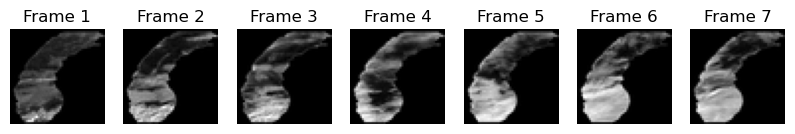

In [252]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 7, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Model Construction

To build a Convolutional LSTM model, we will use the
`ConvLSTM2D` layer, which will accept inputs of shape
`(batch_size, num_frames, width, height, channels)`, and return
a prediction movie of the same shape.

In [253]:
x_train.shape

(2994, 6, 48, 48, 1)

In [254]:
x_train.shape[2:]

(48, 48, 1)

In [255]:
(None, x_train.shape[2:])

(None, (48, 48, 1))

In [256]:
(None, *x_train.shape[2:])

(None, 48, 48, 1)

In [257]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    activation="relu",
)(inp)
print("Conv2D kernel_size=(5, 5)", x.shape)

Conv2D kernel_size=(5, 5) (None, None, 48, 48, 64)


Keras' [ConvLSTM2D](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/) is a  2D Convolutional LSTM.

Similar to an LSTM layer, but the input transformations and recurrent transformations are both convolutional.

`filters` parameter: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).

`padding` parameter: One of `valid` or `same` (case-insensitive). `valid` means no padding. `same` results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

`data_format` parameter: A string, one of `channels_last` (default) or `channels_first`. The ordering of the dimensions in the inputs. `channels_last` corresponds to inputs with shape `(batch, time, ..., channels)` while `channels_first` corresponds to inputs with shape `(batch, time, channels, ...)`. It defaults to the image_data_format value found in your Keras config file at `~/.keras/keras.json`. If you never set it, then it will be `channels_last`.

`dropout` parameter: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.

`recurrent_dropout` parameter: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state.

### Input shape 
If data_format=`channels_first`: 5D tensor with shape: (samples, time, channels, rows, cols).

If data_format=`channels_last` 5D tensor with shape: (samples, time, rows, cols, channels)

### Output shape

If `return_state = True`: a list of tensors. The first tensor is the output. The remaining tensors are the last states, each 4D tensor with shape: `(samples, filters, new_rows, new_cols)` if data_format=`channels_first` or shape: `(samples, new_rows, new_cols, filters)` if data_format=`channels_last`. rows and cols values might have changed due to padding.

If `return_sequences = True` 5D tensor with shape: `(samples, timesteps, filters, new_rows, new_cols)` if data_format=`channels_first` or shape: `(samples, timesteps, new_rows, new_cols, filters)` if data_format=`channels_last`.
Else, 4D tensor with shape: `(samples, filters, new_rows, new_cols)` if data_format=`channels_first` or shape: `(samples, new_rows, new_cols, filters)` if data_format=`channels_last`.

In [258]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(5, 5)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(5, 5) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


Next, we will build the complete model and compile it.

In [259]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 48, 48, 1)  0         
                             ]                                   
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 48, 48, 64)  416256    
                                                                 
 batch_normalization (BatchN  (None, None, 48, 48, 64)  256      
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 48, 48, 64)  295168    
                                                                 
 batch_normalization_1 (Batc  (None, None, 48, 48, 64)  256      
 hNormalization)                                                 
                                                             

## Model Training

With our model and data constructed, we can now train the model.

Early stopping: Stop training when a monitored metric has stopped improving. The [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback assumes the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

Reducing learning rate when a metric has stopped improving: Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. The [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/) callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

Using parameter `min_delta=0.005` (`min_delta=0.0001` default)

In [261]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, min_delta=0.005)

# Define modifiable training hyperparameters
epochs = 20
batch_size = 5

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 01:53:06
Epoch 1/20
599/599 [==============================] - 119s 159ms/step - loss: 0.2435 - val_loss: 0.2757 - lr: 0.0010
Epoch 2/20
599/599 [==============================] - 95s 158ms/step - loss: 0.2349 - val_loss: 0.2373 - lr: 0.0010
Epoch 3/20
599/599 [==============================] - 94s 157ms/step - loss: 0.2344 - val_loss: 0.2371 - lr: 0.0010
Epoch 4/20
599/599 [==============================] - 94s 157ms/step - loss: 0.2340 - val_loss: 0.2376 - lr: 0.0010
Epoch 5/20
599/599 [==============================] - 94s 157ms/step - loss: 0.2338 - val_loss: 0.2370 - lr: 0.0010
Epoch 6/20
599/599 [==============================] - 94s 158ms/step - loss: 0.2337 - val_loss: 0.2368 - lr: 0.0010
Epoch 7/20
599/599 [==============================] - 94s 158ms/step - loss: 0.2336 - val_loss: 0.2368 - lr: 0.0010
Epoch 8/20
599/599 [==============================] - 94s 157ms/step - loss: 0.2332 - val_loss: 0.2365 - lr: 1.0000e-04
Epoch 9/20
599/599 [==================

Hmm.. Looks like I plateaued :-(

## Frame Prediction Visualizations

With our model now trained, we can generate some example frame predictions based on a new video.

We'll pick a random sequence of 7 frames from the validation set and then choose the first 5 frames from it. From there, we allow the model to predict the next 2 frames, which we compare to the last two ground truth frames in the original sequence.

In [277]:
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print(example_index)
example = val_dataset[example_index]
print(example.shape)
print(example[:3, ...].shape)
print(example[3:-1, ...].shape)

838
(7, 48, 48, 1)
(3, 48, 48, 1)
(3, 48, 48, 1)


Picked index 117 from validation dataset.
1/1 [==============================] - 0s 22ms/step

The top row consists of 7 original frames.
The bottom row consists of the 5 original frames and the next two are predicted.


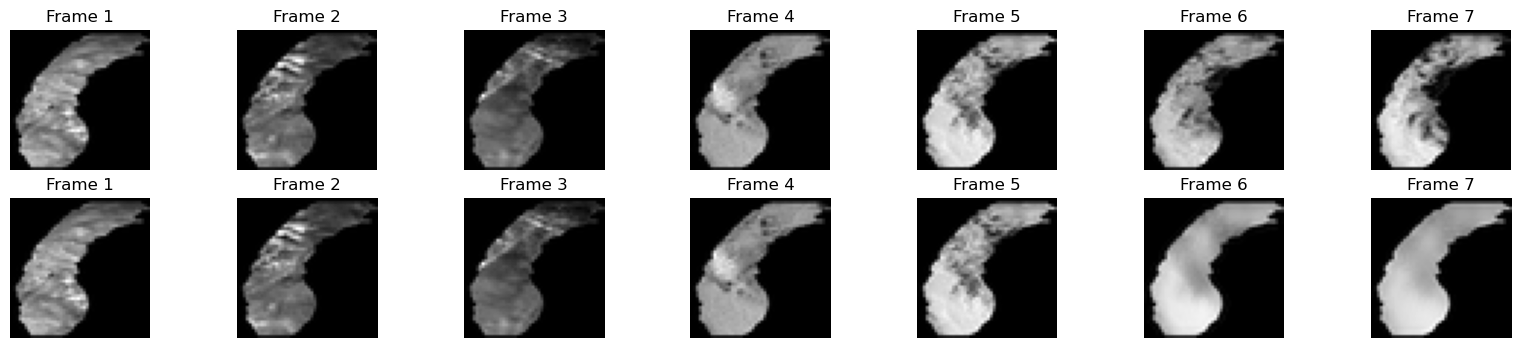

In [286]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 5 frames from the example
frames = example[:5, ...]
original_frames = example[:, ...]

# Use the first 5 frames to predict the next 2 frames
# Note that the last predicted frame uses the first predicted
# frame (so, no teacher forcing here)
for _ in range(2):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 7, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 7 original frames.")
print("The bottom row consists of the 5 original frames and the next two are predicted.")
plt.show()

We can see that Frame 6 (a predicted frame) has kept a shadow from its previous frame (original frame 5), but the frame 6 prediction does not match the original frame above it.

We should try training with more data and for more epochs.

# More data, more epochs

In [289]:
imgs_train_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[:10000], None, 7, sequence_stride=1, 
                                                                        sampling_rate=1, batch_size=10000)
imgs_val_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[13050:], None, 7, sequence_stride=1, 
                                                                       sampling_rate=1, batch_size=3000)

In [290]:
train_dataset = None
for batch in imgs_train_batch:
    train_dataset = np.expand_dims(batch, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255

(9994, 7, 48, 48, 1)


In [291]:
val_dataset = None
for batch in imgs_val_batch:
    val_dataset = np.expand_dims(batch, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255

(2903, 7, 48, 48, 1)


In [292]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (9994, 6, 48, 48, 1), (9994, 6, 48, 48, 1)
Validation Dataset Shapes: (2903, 6, 48, 48, 1), (2903, 6, 48, 48, 1)


In [302]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 5 3x3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


In [303]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, 48, 48, 1)  0         
                             ]                                   
                                                                 
 conv_lstm2d_9 (ConvLSTM2D)  (None, None, 48, 48, 64)  150016    
                                                                 
 batch_normalization_6 (Batc  (None, None, 48, 48, 64)  256      
 hNormalization)                                                 
                                                                 
 conv_lstm2d_10 (ConvLSTM2D)  (None, None, 48, 48, 64)  295168   
                                                                 
 batch_normalization_7 (Batc  (None, None, 48, 48, 64)  256      
 hNormalization)                                                 
                                                           

In [305]:
# Define some callbacks to improve training
#early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=7)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 16

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("Finished training at", current_time)

Started training at 05/20/2023, 23:24:39
Epoch 1/100
625/625 [==============================] - 391s 625ms/step - loss: 0.2369 - val_loss: 0.3011 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2350 - val_loss: 0.2489 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2344 - val_loss: 0.2461 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2341 - val_loss: 0.2445 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2340 - val_loss: 0.2470 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2344 - val_loss: 0.2549 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2339 - val_loss: 0.2491 - lr: 0.0010
Epoch 8/100
625/625 [==============================] - 390s 624ms/step - loss: 0.2340 - val_loss: 0.2519 - lr: 0.0010
Epoch 9/100
625

Picked index 94 from validation dataset.
1/1 [==============================] - 0s 44ms/step

The top row consists of 7 original frames.
The bottom row consists of the 5 original frames and the next two are predicted.


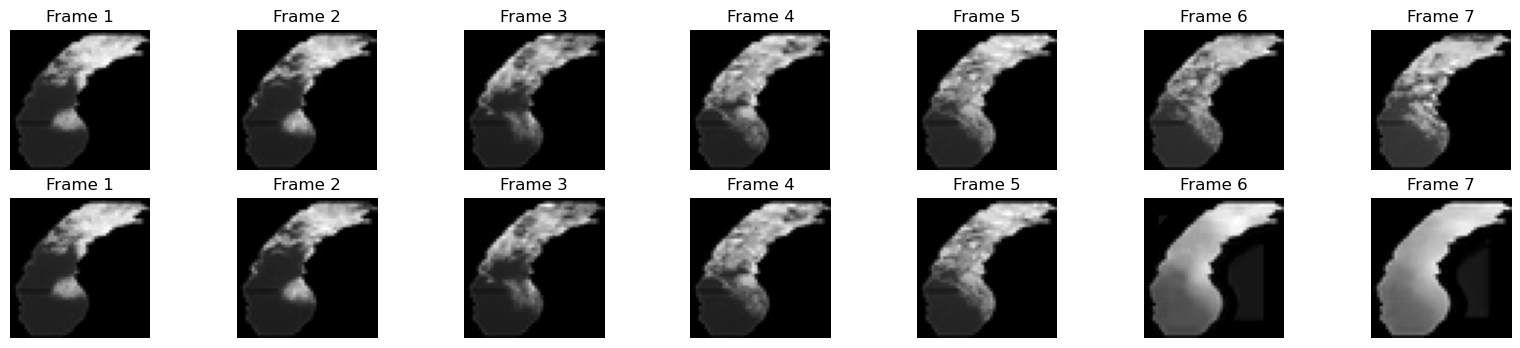

In [307]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 5 frames from the example
frames = example[:5, ...]
original_frames = example[:, ...]

# Use the first 5 frames to predict the next 2 frames
# Note that the last predicted frame uses the first predicted
# frame (so, no teacher forcing here)
for _ in range(2):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 7, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 7 original frames.")
print("The bottom row consists of the 5 original frames and the next two are predicted.")
plt.show()

The problem with our predictions is that although we get the rough shape of the clouds, we do not predict the intensity of the clouds correctly, and it's cloud intensity that causes rain and snow! Look at predicted Frame 6 in the bottom row: It looks like the original in the row above but the intensity is reduced. Same for Frame 7.

One possible problem is the discontinuity between the last frame of the previous day and the first frame of the next day in our training sequences: Nighttime cloud imagery is not available and we *skip it*. So, we probably teach the network incorrect frame sequencing.

How can we put a nighttime break in our sequences so we don't teach this discontinuity? 

Here's an example of one:

5890
Displaying frames for example 5890.


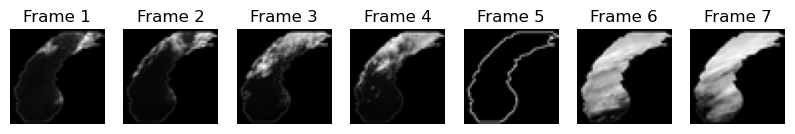

In [313]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 7, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
print(data_choice)
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

Moreover, we cannot really afford to skip meteo nighttime data, so we ideally should not do what we did above:
```
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
```

Instead, we should keep meteo nighttime data since it might actually be consequential to snow (e.g. if it gets cold at night) and indicate null imagery instead. 

But then how do we skip that imgery in the training, since I'm assuming we will be concatenating the output from the RNN for the meteo data and the output from the ConvLSTM2D for the imagery, and then feeding that into one final output layer to predict snow or no snow.

This requires some heavy thinking.

>Day later..

Ok, I want to do *three* experiments: Predict next cloud frames without nighttime interruptions, first using a few frames as input sequence and then more frames as input sequence, and also predict the cloud frame *next day* from all cloud frames the previous day $+$ meteo data previous day $+$ meteo data in the nighttime.

# 8. Predicting daytime cloud frame from previous hour one
We are going to attempt to predict the next cloud frame given the previous one.

We are going to accomplish this be feeding a sequence of two frames as input, and training the output to be the sequence consisting of the next consecutive 2 frames in our dataset.

We are going to shape the data as sequences of 3 frames, from which we are going to source the first 2 frames and the next consecutive 2 frames.

Suppose we have seven daytime frames in our dataset, followed by seven the day after, etc. Let's simulate this by changing the sign of the image data every day:

In [325]:
np.arange(0, -4, -1)

array([ 0, -1, -2, -3])

In [327]:
a = []
for i in range(7):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
for i in range(7):
    a.append(np.arange(-i, -4 - i, -1).reshape((2, 2)))
for i in range(7):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
for i in range(7):
    a.append(np.arange(-i, -4 - i, -1).reshape((2, 2)))
a

[array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 0, -1],
        [-2, -3]]),
 array([[-1, -2],
        [-3, -4]]),
 array([[-2, -3],
        [-4, -5]]),
 array([[-3, -4],
        [-5, -6]]),
 array([[-4, -5],
        [-6, -7]]),
 array([[-5, -6],
        [-7, -8]]),
 array([[-6, -7],
        [-8, -9]]),
 array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 0, -1],
        [-2, -3]]),
 array([[-1, -2],
        [-3, -4]]),
 array([[-2, -3],
        [-4, -5]]),
 array([[-3, -4],
        [-5, -6]]),
 array([[-4, -5],
        [-6, -7]]),
 array([[-5, -6],
        [-7, -8]]),
 array([[-6, -7],
        [-8,

This is how we create the *first* 3-frames for each day (note: we use a `sequence_stride` of 7):

In [338]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 3, sequence_stride=7, sampling_rate=1)

for batch1 in x1:
    print(batch1)
    print('--')

tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]]


 [[[ 0 -1]
   [-2 -3]]

  [[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]]


 [[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]]


 [[[ 0 -1]
   [-2 -3]]

  [[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]]], shape=(4, 3, 2, 2), dtype=int32)
--


Now let's see if we can sample every possible 3-frames *of the same day*:

In [339]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 3, sequence_stride=7, sampling_rate=1)
x2 = tf.keras.preprocessing.timeseries_dataset_from_array(a[1:], None, 3, sequence_stride=7, sampling_rate=1)
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(a[2:], None, 3, sequence_stride=7, sampling_rate=1)

for b1, b2, b3 in zip(x1, x2, x3):
    print(np.concatenate(([b1[0]], [b2[0]], [b3[0]]), axis=0))
    break

[[[[0 1]
   [2 3]]

  [[1 2]
   [3 4]]

  [[2 3]
   [4 5]]]


 [[[1 2]
   [3 4]]

  [[2 3]
   [4 5]]

  [[3 4]
   [5 6]]]


 [[[2 3]
   [4 5]]

  [[3 4]
   [5 6]]

  [[4 5]
   [6 7]]]]


In [340]:
for b1, b2, b3 in zip(x1, x2, x3):
    print(np.concatenate(([b1[0]], [b2[0]], [b3[0]]), axis=0))
    print('--')
    print(np.concatenate(([b1[1]], [b2[1]], [b3[1]]), axis=0))
    print('--')
    print(np.concatenate(([b1[2]], [b2[2]], [b3[2]]), axis=0))
    print('--')

[[[[0 1]
   [2 3]]

  [[1 2]
   [3 4]]

  [[2 3]
   [4 5]]]


 [[[1 2]
   [3 4]]

  [[2 3]
   [4 5]]

  [[3 4]
   [5 6]]]


 [[[2 3]
   [4 5]]

  [[3 4]
   [5 6]]

  [[4 5]
   [6 7]]]]
--
[[[[ 0 -1]
   [-2 -3]]

  [[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]]


 [[[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]

  [[-3 -4]
   [-5 -6]]]


 [[[-2 -3]
   [-4 -5]]

  [[-3 -4]
   [-5 -6]]

  [[-4 -5]
   [-6 -7]]]]
--
[[[[0 1]
   [2 3]]

  [[1 2]
   [3 4]]

  [[2 3]
   [4 5]]]


 [[[1 2]
   [3 4]]

  [[2 3]
   [4 5]]

  [[3 4]
   [5 6]]]


 [[[2 3]
   [4 5]]

  [[3 4]
   [5 6]]

  [[4 5]
   [6 7]]]]
--


In [344]:
for b1, b2, b3 in zip(x1, x2, x3):
    print(np.concatenate((
        np.concatenate(([b1[0]], [b2[0]], [b3[0]]), axis=0),
        np.concatenate(([b1[1]], [b2[1]], [b3[1]]), axis=0), 
        np.concatenate(([b1[2]], [b2[2]], [b3[2]]), axis=0)
    ), axis = 0))
    print('--')

[[[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]]


 [[[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]]


 [[[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 0 -1]
   [-2 -3]]

  [[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]]


 [[[-1 -2]
   [-3 -4]]

  [[-2 -3]
   [-4 -5]]

  [[-3 -4]
   [-5 -6]]]


 [[[-2 -3]
   [-4 -5]]

  [[-3 -4]
   [-5 -6]]

  [[-4 -5]
   [-6 -7]]]


 [[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]]


 [[[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]]


 [[[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]]]
--


Ok, this seems to work: A way to get all 3-long sequences of daytime cloud frames, skipping night discontinuities.

Let's verify that our dataset consists of 7 rows of daytimes followed by the 7 rows of the next day:

In [346]:
filtered_les.head(50)

File_name_for_1D_lake  \
0   goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1   goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2   goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3   goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4   goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
5   goes11.2006.10.01.1900.v01.nc-var1-t0.csv   
6   goes11.2006.10.01.2000.v01.nc-var1-t0.csv   
7   goes11.2006.10.01.2100.v01.nc-var1-t0.csv   
8   goes11.2006.10.02.1400.v01.nc-var1-t0.csv   
9   goes11.2006.10.02.1500.v01.nc-var1-t0.csv   
10  goes11.2006.10.02.1600.v01.nc-var1-t0.csv   
11  goes11.2006.10.02.1700.v01.nc-var1-t0.csv   
12  goes11.2006.10.02.1800.v01.nc-var1-t0.csv   
13  goes11.2006.10.02.1900.v01.nc-var1-t0.csv   
14  goes11.2006.10.02.2000.v01.nc-var1-t0.csv   
15  goes11.2006.10.02.2100.v01.nc-var1-t0.csv   
16  goes11.2006.10.03.1400.v01.nc-var1-t0.csv   
17  goes11.2006.10.03.1500.v01.nc-var1-t0.csv   
18  goes11.2006.10.03.1600.v01.nc-var1-t0.csv   
19  goes11.2006.10.03.1700.v01.nc-var1-t0.csv   
20  goes11.2006.10.03.1800.v01.nc-var1-t0.csv   
21  goes11.2006.10.03.1900.v01.nc-var1-t0.csv   
22  goes11.2006.10.03.2000.v01.nc-var1-t0.csv   
23  goes11.2006.10.03.2100.v01.nc-var1-t0.csv   
24  goes11.2006.10.04.1400.v01.nc-var1-t0.csv   
25  goes11.2006.10.04.1500.v01.nc-var1-t0.csv   
26  goes11.2006.10.04.1600.v01.nc-var1-t0.csv   
27  goes11.2006.10.04.1700.v01.nc-var1-t0.csv   
28  goes11.2006.10.04.1800.v01.nc-var1-t0.csv   
29  goes11.2006.10.04.1900.v01.nc-var1-t0.csv   
30  goes11.2006.10.04.2000.v01.nc-var1-t0.csv   
31  goes11.2006.10.04.2100.v01.nc-var1-t0.csv   
32  goes11.2006.10.05.1400.v01.nc-var1-t0.csv   
33  goes11.2006.10.05.1500.v01.nc-var1-t0.csv   
34  goes11.2006.10.05.1600.v01.nc-var1-t0.csv   
35  goes11.2006.10.05.1700.v01.nc-var1-t0.csv   
36  goes11.2006.10.05.1800.v01.nc-var1-t0.csv   
37  goes11.2006.10.05.1900.v01.nc-var1-t0.csv   
38  goes11.2006.10.05.2000.v01.nc-var1-t0.csv   
39                                       None   
40  goes11.2006.10.06.1400.v01.nc-var1-t0.csv   
41  goes11.2006.10.06.1500.v01.nc-var1-t0.csv   
42  goes11.2006.10.06.1600.v01.nc-var1-t0.csv   
43  goes11.2006.10.06.1700.v01.nc-var1-t0.csv   
44  goes11.2006.10.06.1800.v01.nc-var1-t0.csv   
45  goes11.2006.10.06.1900.v01.nc-var1-t0.csv   
46  goes11.2006.10.06.2000.v01.nc-var1-t0.csv   
47  goes11.2006.10.06.2100.v01.nc-var1-t0.csv   
48  goes11.2006.10.07.1400.v01.nc-var1-t0.csv   
49  goes11.2006.10.07.1500.v01.nc-var1-t0.csv   

                              File_name_for_2D_lake  \
0   T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1   T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2   T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3   T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4   T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
5   T_goes11.2006.10.01.1900.v01.nc-var1-t0.csv.csv   
6   T_goes11.2006.10.01.2000.v01.nc-var1-t0.csv.csv   
7   T_goes11.2006.10.01.2100.v01.nc-var1-t0.csv.csv   
8   T_goes11.2006.10.02.1400.v01.nc-var1-t0.csv.csv   
9   T_goes11.2006.10.02.1500.v01.nc-var1-t0.csv.csv   
10  T_goes11.2006.10.02.1600.v01.nc-var1-t0.csv.csv   
11  T_goes11.2006.10.02.1700.v01.nc-var1-t0.csv.csv   
12  T_goes11.2006.10.02.1800.v01.nc-var1-t0.csv.csv   
13  T_goes11.2006.10.02.1900.v01.nc-var1-t0.csv.csv   
14  T_goes11.2006.10.02.2000.v01.nc-var1-t0.csv.csv   
15  T_goes11.2006.10.02.2100.v01.nc-var1-t0.csv.csv   
16  T_goes11.2006.10.03.1400.v01.nc-var1-t0.csv.csv   
17  T_goes11.2006.10.03.1500.v01.nc-var1-t0.csv.csv   
18  T_goes11.2006.10.03.1600.v01.nc-var1-t0.csv.csv   
19  T_goes11.2006.10.03.1700.v01.nc-var1-t0.csv.csv   
20  T_goes11.2006.10.03.1800.v01.nc-var1-t0.csv.csv   
21  T_goes11.2006.10.03.1900.v01.nc-var1-t0.csv.csv   
22  T_goes11.2006.10.03.2000.v01.nc-var1-t0.csv.csv   
23  T_goes11.2006.10.03.2100.v01.nc-var1-t0.csv.csv   
24  T_goes11.2006.10.04.1400.v01.nc-var1-t0.csv.csv   
25  T_goes11.2006.10.04.1500.v01.nc-var1-t0.csv.csv   
26  T_goes11.2006.10.04.1600.v01.nc-var

In [347]:
filtered_les.tail(50)

File_name_for_1D_lake  \
15909  goes15.2015.03.25.2000.v01.nc-var1-t0.csv   
15910  goes15.2015.03.25.2100.v01.nc-var1-t0.csv   
15911  goes15.2015.03.26.1400.v01.nc-var1-t0.csv   
15912  goes15.2015.03.26.1500.v01.nc-var1-t0.csv   
15913  goes15.2015.03.26.1600.v01.nc-var1-t0.csv   
15914  goes15.2015.03.26.1700.v01.nc-var1-t0.csv   
15915  goes15.2015.03.26.1800.v01.nc-var1-t0.csv   
15916  goes15.2015.03.26.1900.v01.nc-var1-t0.csv   
15917                                       None   
15918  goes15.2015.03.26.2100.v01.nc-var1-t0.csv   
15919  goes15.2015.03.27.1400.v01.nc-var1-t0.csv   
15920  goes15.2015.03.27.1500.v01.nc-var1-t0.csv   
15921  goes15.2015.03.27.1600.v01.nc-var1-t0.csv   
15922  goes15.2015.03.27.1700.v01.nc-var1-t0.csv   
15923  goes15.2015.03.27.1800.v01.nc-var1-t0.csv   
15924  goes15.2015.03.27.1900.v01.nc-var1-t0.csv   
15925  goes15.2015.03.27.2000.v01.nc-var1-t0.csv   
15926  goes15.2015.03.27.2100.v01.nc-var1-t0.csv   
15927  goes15.2015.03.28.1400.v01.nc-var1-t0.csv   
15928  goes15.2015.03.28.1500.v01.nc-var1-t0.csv   
15929  goes15.2015.03.28.1600.v01.nc-var1-t0.csv   
15930  goes15.2015.03.28.1700.v01.nc-var1-t0.csv   
15931  goes15.2015.03.28.1800.v01.nc-var1-t0.csv   
15932  goes15.2015.03.28.1900.v01.nc-var1-t0.csv   
15933  goes15.2015.03.28.2000.v01.nc-var1-t0.csv   
15934  goes15.2015.03.28.2100.v01.nc-var1-t0.csv   
15935  goes15.2015.03.29.1400.v01.nc-var1-t0.csv   
15936  goes15.2015.03.29.1500.v01.nc-var1-t0.csv   
15937  goes15.2015.03.29.1600.v01.nc-var1-t0.csv   
15938  goes15.2015.03.29.1700.v01.nc-var1-t0.csv   
15939  goes15.2015.03.29.1800.v01.nc-var1-t0.csv   
15940  goes15.2015.03.29.1900.v01.nc-var1-t0.csv   
15941  goes15.2015.03.29.2000.v01.nc-var1-t0.csv   
15942  goes15.2015.03.29.2100.v01.nc-var1-t0.csv   
15943  goes15.2015.03.30.1400.v01.nc-var1-t0.csv   
15944  goes15.2015.03.30.1500.v01.nc-var1-t0.csv   
15945  goes15.2015.03.30.1600.v01.nc-var1-t0.csv   
15946  goes15.2015.03.30.1700.v01.nc-var1-t0.csv   
15947  goes15.2015.03.30.1800.v01.nc-var1-t0.csv   
15948  goes15.2015.03.30.1900.v01.nc-var1-t0.csv   
15949  goes15.2015.03.30.2000.v01.nc-var1-t0.csv   
15950  goes15.2015.03.30.2100.v01.nc-var1-t0.csv   
15951  goes15.2015.03.31.1400.v01.nc-var1-t0.csv   
15952  goes15.2015.03.31.1500.v01.nc-var1-t0.csv   
15953  goes15.2015.03.31.1600.v01.nc-var1-t0.csv   
15954  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
15955  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
15956  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
15957  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
15958  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
15909  T_goes15.2015.03.25.2000.v01.nc-var1-t0.csv.csv   
15910  T_goes15.2015.03.25.2100.v01.nc-var1-t0.csv.csv   
15911  T_goes15.2015.03.26.1400.v01.nc-var1-t0.csv.csv   
15912  T_goes15.2015.03.26.1500.v01.nc-var1-t0.csv.csv   
15913  T_goes15.2015.03.26.1600.v01.nc-var1-t0.csv.csv   
15914  T_goes15.2015.03.26.1700.v01.nc-var1-t0.csv.csv   
15915  T_goes15.2015.03.26.1800.v01.nc-var1-t0.csv.csv   
15916  T_goes15.2015.03.26.1900.v01.nc-var1-t0.csv.csv   
15917                                             None   
15918  T_goes15.2015.03.26.2100.v01.nc-var1-t0.csv.csv   
15919  T_goes15.2015.03.27.1400.v01.nc-var1-t0.csv.csv   
15920  T_goes15.2015.03.27.1500.v01.nc-var1-t0.csv.csv   
15921  T_goes15.2015.03.27.1600.v01.nc-var1-t0.csv.csv   
15922  T_goes15.2015.03.27.1700.v01.nc-var1-t0.csv.csv   
15923  T_goes15.2015.03.27.1800.v01.nc-var1-t0.csv.csv   
15924  T_goes15.2015.03.27.1900.v01.nc-var1-t0.csv.csv   
15925  T_goes15.2015.03.27.2000.v01.nc-var1-t0.csv.csv   
15926  T_goes15.2015.03.27.2100.v01.nc-var1-t0.csv.csv   
15927  T_goes15.2015.03.28.1400.v01.nc-var1-t0.csv.csv   
15928  T_goes15.2015.03.28.1500.v01.nc-var1-t0.csv.csv   
15929  T_goes15.2015.03.28.1600.v01.nc-var1-t0.csv.csv   
15930  T_goes15.2015.03.28.1700.v01.nc-var1-t0.csv.csv   
15931  T_goes15.2015.03.28.1800.v01.nc-v

Oopsie, it looks like we have ***8*** hours of daytime! And sometimes, we have ***junk***, like rows 39 and 15917 above. Let's see if we can live with this.

8 hours means we have 6 possible sequences per day with consecutive frames of 3 elements to predict the next 3-frame: From $(0,1,2)$ to $(5,6,7)$. We want to predict the next frame from the previous one:

$$(0,1,2) \rightarrow (1,2,3)$$
$$(1,2,3) \rightarrow (2,3,4)$$
$$(2,3,4) \rightarrow (3,4,5)$$
$$(3,4,5) \rightarrow (4,5,6)$$
$$(4,5,6) \rightarrow (5,6,7)$$

Let's test this. The following consists of frames of $2 \times 2$ arrays (representing a cloud frame) where we have 8 consecutive frames per day. When we change sign, we move to the next day:

In [397]:
a = []
for i in range(8):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
for i in range(8):
    a.append(np.arange(-i, -4 - i, -1).reshape((2, 2)))
for i in range(8):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
for i in range(8):
    a.append(np.arange(-i, -4 - i, -1).reshape((2, 2)))
a

[array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 7,  8],
        [ 9, 10]]),
 array([[ 0, -1],
        [-2, -3]]),
 array([[-1, -2],
        [-3, -4]]),
 array([[-2, -3],
        [-4, -5]]),
 array([[-3, -4],
        [-5, -6]]),
 array([[-4, -5],
        [-6, -7]]),
 array([[-5, -6],
        [-7, -8]]),
 array([[-6, -7],
        [-8, -9]]),
 array([[ -7,  -8],
        [ -9, -10]]),
 array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 7,  8],
        [ 9, 10]]),
 array([[ 0, -1],
        [-2, -3]]),
 array([[-1, -2],
        [-3, -4]]),
 array([[-2, -3],
        [-4, -5]]),
 array([[-3, -4],
        

And this is how we create all possible batches of 3-frames per day, when there are 8 frames per day in our dataset:

In [366]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 3, sequence_stride=8, sampling_rate=1)
x2 = tf.keras.preprocessing.timeseries_dataset_from_array(a[1:], None, 3, sequence_stride=8, sampling_rate=1)
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(a[2:], None, 3, sequence_stride=8, sampling_rate=1)
x4 = tf.keras.preprocessing.timeseries_dataset_from_array(a[3:], None, 3, sequence_stride=8, sampling_rate=1)
x5 = tf.keras.preprocessing.timeseries_dataset_from_array(a[4:], None, 3, sequence_stride=8, sampling_rate=1)
x6 = tf.keras.preprocessing.timeseries_dataset_from_array(a[5:], None, 3, sequence_stride=8, sampling_rate=1)

for b1, b2, b3, b4, b5, b6 in zip(x1, x2, x3, x4, x5, x6):
    print(np.concatenate((
        np.concatenate(([b1[0]], [b2[0]], [b3[0]], [b4[0]], [b5[0]], [b6[0]]), axis=0),
        np.concatenate(([b1[1]], [b2[1]], [b3[1]], [b4[1]], [b5[1]], [b6[1]]), axis=0), 
        np.concatenate(([b1[2]], [b2[2]], [b3[2]], [b4[2]], [b5[2]], [b6[2]]), axis=0),
        np.concatenate(([b1[3]], [b2[3]], [b3[3]], [b4[3]], [b5[3]], [b6[3]]), axis=0)
    ), axis = 0))
    print('--')

[[[[  0   1]
   [  2   3]]

  [[  1   2]
   [  3   4]]

  [[  2   3]
   [  4   5]]]


 [[[  1   2]
   [  3   4]]

  [[  2   3]
   [  4   5]]

  [[  3   4]
   [  5   6]]]


 [[[  2   3]
   [  4   5]]

  [[  3   4]
   [  5   6]]

  [[  4   5]
   [  6   7]]]


 [[[  3   4]
   [  5   6]]

  [[  4   5]
   [  6   7]]

  [[  5   6]
   [  7   8]]]


 [[[  4   5]
   [  6   7]]

  [[  5   6]
   [  7   8]]

  [[  6   7]
   [  8   9]]]


 [[[  5   6]
   [  7   8]]

  [[  6   7]
   [  8   9]]

  [[  7   8]
   [  9  10]]]


 [[[  0  -1]
   [ -2  -3]]

  [[ -1  -2]
   [ -3  -4]]

  [[ -2  -3]
   [ -4  -5]]]


 [[[ -1  -2]
   [ -3  -4]]

  [[ -2  -3]
   [ -4  -5]]

  [[ -3  -4]
   [ -5  -6]]]


 [[[ -2  -3]
   [ -4  -5]]

  [[ -3  -4]
   [ -5  -6]]

  [[ -4  -5]
   [ -6  -7]]]


 [[[ -3  -4]
   [ -5  -6]]

  [[ -4  -5]
   [ -6  -7]]

  [[ -5  -6]
   [ -7  -8]]]


 [[[ -4  -5]
   [ -6  -7]]

  [[ -5  -6]
   [ -7  -8]]

  [[ -6  -7]
   [ -8  -9]]]


 [[[ -5  -6]
   [ -7  -8]]

  [[ -6  -7]
   [ -8  -9]]

Let's do this for our images dataset now, for both training and validation:

In [372]:
len(images)

15959

In [368]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(images[:10000], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
x2 = tf.keras.preprocessing.timeseries_dataset_from_array(images[1:10001], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(images[2:10001], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
x4 = tf.keras.preprocessing.timeseries_dataset_from_array(images[3:10003], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
x5 = tf.keras.preprocessing.timeseries_dataset_from_array(images[4:10004], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
x6 = tf.keras.preprocessing.timeseries_dataset_from_array(images[5:10005], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)

In [369]:
y1 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13050:-5], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)
y2 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13051:-4], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)
y3 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13052:-3], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)
y4 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13053:-2], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)
y5 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13054:-1], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)
y6 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13055:], None, 3, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)

And now we can create our training and validation datasets, consisting of all possible 3-frames-long sequences:

In [379]:
train_dataset = None
for b1, b2, b3, b4, b5, b6 in zip(x1, x2, x3, x4, x5, x6):
    print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape, b6.shape)
    for i in range(0, b1.shape[0] - 4, 4):
        batch = np.concatenate((
            np.concatenate(([b1[i]], [b2[i]], [b3[i]], [b4[i]], [b5[i]], [b6[i]]), axis=0),
            np.concatenate(([b1[1]], [b2[i+1]], [b3[i+1]], [b4[i+1]], [b5[i+1]], [b6[i+1]]), axis=0), 
            np.concatenate(([b1[i+2]], [b2[i+2]], [b3[i+2]], [b4[i+2]], [b5[i+2]], [b6[i+2]]), axis=0),
            np.concatenate(([b1[i+3]], [b2[i+3]], [b3[i+3]], [b4[i+3]], [b5[i+3]], [b6[i+3]]), axis=0)
        ), axis = 0)
        if i == 0:
            train_dataset = batch
        else:
            train_dataset = np.concatenate((train_dataset, batch), axis = 0)
        
    train_dataset = np.expand_dims(train_dataset, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255
    print('--')

(1250, 3, 48, 48) (1250, 3, 48, 48) (1250, 3, 48, 48) (1250, 3, 48, 48) (1250, 3, 48, 48) (1250, 3, 48, 48)
(7488, 3, 48, 48, 1)
--


In [380]:
val_dataset = None
for b1, b2, b3, b4, b5, b6 in zip(y1, y2, y3, y4, y5, y6):
    print(b1.shape, b2.shape, b3.shape, b4.shape, b5.shape, b6.shape)
    for i in range(0, b1.shape[0] - 4, 4):
        batch = np.concatenate((
            np.concatenate(([b1[i]], [b2[i]], [b3[i]], [b4[i]], [b5[i]], [b6[i]]), axis=0),
            np.concatenate(([b1[1]], [b2[i+1]], [b3[i+1]], [b4[i+1]], [b5[i+1]], [b6[i+1]]), axis=0), 
            np.concatenate(([b1[i+2]], [b2[i+2]], [b3[i+2]], [b4[i+2]], [b5[i+2]], [b6[i+2]]), axis=0),
            np.concatenate(([b1[i+3]], [b2[i+3]], [b3[i+3]], [b4[i+3]], [b5[i+3]], [b6[i+3]]), axis=0)
        ), axis = 0)
        if i == 0:
            val_dataset = batch
        else:
            val_dataset = np.concatenate((val_dataset, batch), axis = 0)
        
    val_dataset = np.expand_dims(val_dataset, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255
    print('--')

(363, 3, 48, 48) (363, 3, 48, 48) (363, 3, 48, 48) (363, 3, 48, 48) (363, 3, 48, 48) (363, 3, 48, 48)
(2160, 3, 48, 48, 1)
--


Visualize:

Displaying frames for example 1402.


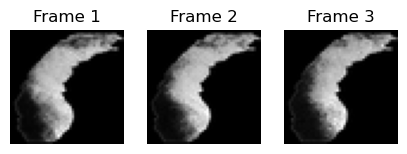

In [384]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 3, figsize=(5, 4))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

Now let's build our shifted datasets so that the input consists of 2 sequential frames and the output consists of the next 2 sequential frames. We source these frames from each 3-frame long sequence in our training dataset:

In [387]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (7488, 2, 48, 48, 1), (7488, 2, 48, 48, 1)
Validation Dataset Shapes: (2160, 2, 48, 48, 1), (2160, 2, 48, 48, 1)


The top two frames are the input sequence, the bottom two are the output sequence:

Displaying frames for example 3052.


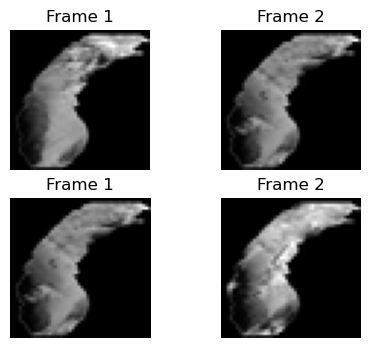

In [390]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(x_train)), size=1)[0]
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(x_train[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")
    
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(y_train[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

Let's use our first network above:

In [385]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(5, 5)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(5, 5) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


In [393]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, 48, 48, 1)  0         
                             ]                                   
                                                                 
 conv_lstm2d_14 (ConvLSTM2D)  (None, None, 48, 48, 64)  416256   
                                                                 
 batch_normalization_10 (Bat  (None, None, 48, 48, 64)  256      
 chNormalization)                                                
                                                                 
 conv_lstm2d_15 (ConvLSTM2D)  (None, None, 48, 48, 64)  295168   
                                                                 
 batch_normalization_11 (Bat  (None, None, 48, 48, 64)  256      
 chNormalization)                                                
                                                           

Let's train:

In [394]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 8

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 22:18:09
Epoch 1/100
936/936 [==============================] - 66s 67ms/step - loss: 0.2397 - val_loss: 0.2590 - lr: 0.0010
Epoch 2/100
936/936 [==============================] - 62s 67ms/step - loss: 0.2393 - val_loss: 0.2575 - lr: 0.0010
Epoch 3/100
936/936 [==============================] - 62s 66ms/step - loss: 0.2391 - val_loss: 0.2571 - lr: 0.0010
Epoch 4/100
936/936 [==============================] - 62s 67ms/step - loss: 0.2389 - val_loss: 0.2575 - lr: 0.0010
Epoch 5/100
936/936 [==============================] - 63s 67ms/step - loss: 0.2387 - val_loss: 0.2576 - lr: 0.0010
Epoch 6/100
936/936 [==============================] - 63s 67ms/step - loss: 0.2386 - val_loss: 0.2579 - lr: 0.0010
Epoch 7/100
936/936 [==============================] - 62s 67ms/step - loss: 0.2386 - val_loss: 0.2604 - lr: 0.0010
Epoch 8/100
936/936 [==============================] - 62s 67ms/step - loss: 0.2385 - val_loss: 0.2599 - lr: 0.0010
Epoch 9/100
936/936 [======================

We see that we plateau real fast. That's an indication that the network *cannot* learn the next frame just from the previous one. Not as much a reflection on the network as much that it means that clouds can move in any direction and if the only information we have is the previous cloud frame, that is just not enough information to determine the next frame.

Wind direction and intensity would probably be a great determining additional piece of information!

Picked index 1831 from validation dataset.
1/1 [==============================] - 0s 18ms/step

The top row consists of 3 original frames.
The bottom row consists of the 2 original frames and the next predicted one.


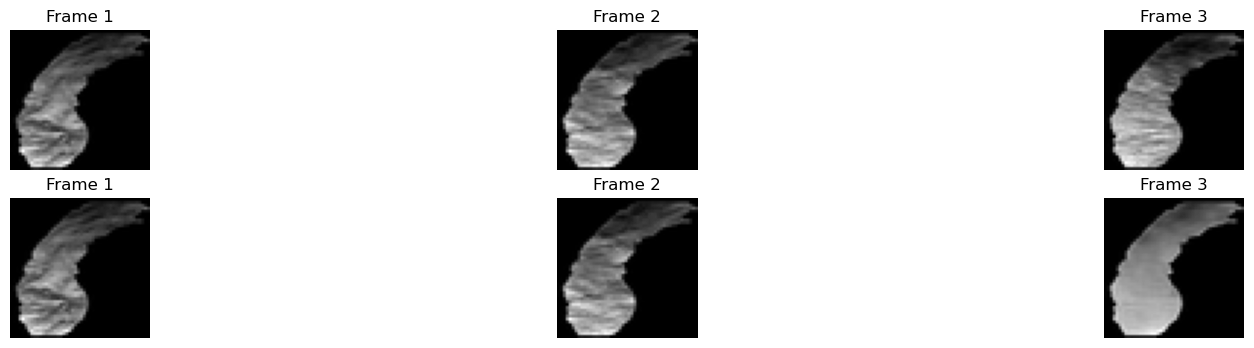

In [396]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 2 frames and the next 2 frames from the example
frames = example[:2, ...]
original_frames = example[:3, ...]

# Use the first 2 frames to predict the next 2 frames
for _ in range(2):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 3, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 3 original frames.")
print("The bottom row consists of the 2 original frames and the next predicted one.")
plt.show()

We see there *is* a degree of prediction, but it is too low quality for us to do meteorology with: The frame to be predicted (frame3 from the top row) is too weakly predicted as frame 3 in the bottom row.

# 9. Predicting the 8th frame from the previous 7
With more past frames, we should be able to accomplish better predictions...

In [408]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 8, sequence_stride=8, sampling_rate=1)

for b1 in x1:
    print(b1)
    print('--')

tf.Tensor(
[[[[  0   1]
   [  2   3]]

  [[  1   2]
   [  3   4]]

  [[  2   3]
   [  4   5]]

  [[  3   4]
   [  5   6]]

  [[  4   5]
   [  6   7]]

  [[  5   6]
   [  7   8]]

  [[  6   7]
   [  8   9]]

  [[  7   8]
   [  9  10]]]


 [[[  0  -1]
   [ -2  -3]]

  [[ -1  -2]
   [ -3  -4]]

  [[ -2  -3]
   [ -4  -5]]

  [[ -3  -4]
   [ -5  -6]]

  [[ -4  -5]
   [ -6  -7]]

  [[ -5  -6]
   [ -7  -8]]

  [[ -6  -7]
   [ -8  -9]]

  [[ -7  -8]
   [ -9 -10]]]


 [[[  0   1]
   [  2   3]]

  [[  1   2]
   [  3   4]]

  [[  2   3]
   [  4   5]]

  [[  3   4]
   [  5   6]]

  [[  4   5]
   [  6   7]]

  [[  5   6]
   [  7   8]]

  [[  6   7]
   [  8   9]]

  [[  7   8]
   [  9  10]]]


 [[[  0  -1]
   [ -2  -3]]

  [[ -1  -2]
   [ -3  -4]]

  [[ -2  -3]
   [ -4  -5]]

  [[ -3  -4]
   [ -5  -6]]

  [[ -4  -5]
   [ -6  -7]]

  [[ -5  -6]
   [ -7  -8]]

  [[ -6  -7]
   [ -8  -9]]

  [[ -7  -8]
   [ -9 -10]]]], shape=(4, 8, 2, 2), dtype=int32)
--


In [443]:
len(images)

15959

In [409]:
x1 = tf.keras.preprocessing.timeseries_dataset_from_array(images[:10000], None, 8, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=10000)
y1 = tf.keras.preprocessing.timeseries_dataset_from_array(images[13050:-5], None, 8, sequence_stride=8, sampling_rate=1, 
                                                          batch_size=3000)

In [410]:
train_dataset = None
for b1 in x1:
    train_dataset = b1
    train_dataset = np.expand_dims(train_dataset, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255
    print('--')

(1250, 8, 48, 48, 1)
--


In [411]:
val_dataset = None
for b1 in y1:
    val_dataset = b1
    val_dataset = np.expand_dims(val_dataset, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255
    print('--')

(363, 8, 48, 48, 1)
--


Displaying frames for example 123.


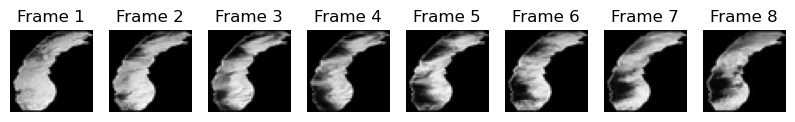

In [413]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 8, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [414]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (1250, 7, 48, 48, 1), (1250, 7, 48, 48, 1)
Validation Dataset Shapes: (363, 7, 48, 48, 1), (363, 7, 48, 48, 1)


So the idea is to use the first 7 frames to predict the last 7 frames!

Displaying frames for example 432.


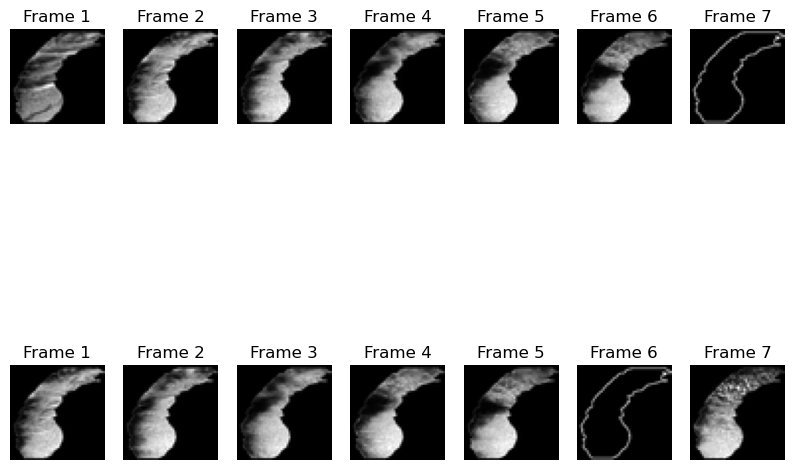

In [419]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 7, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(x_train)), size=1)[0]
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(x_train[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")
    
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(y_train[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

Above we have an example of the first 7 frames in the top row and the last 7 frames in the bottom row.

In other words, the goal is to predict frame 7 from the bottom row.

Note that frame 7 of the top row (equal to frame 6 from the bottom row) is a `nan` frame.

In [420]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(5, 5)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(5, 5) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


In [421]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, 48, 48, 1)  0         
                             ]                                   
                                                                 
 conv_lstm2d_17 (ConvLSTM2D)  (None, None, 48, 48, 64)  416256   
                                                                 
 batch_normalization_12 (Bat  (None, None, 48, 48, 64)  256      
 chNormalization)                                                
                                                                 
 conv_lstm2d_18 (ConvLSTM2D)  (None, None, 48, 48, 64)  295168   
                                                                 
 batch_normalization_13 (Bat  (None, None, 48, 48, 64)  256      
 chNormalization)                                                
                                                           

In [422]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 8

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 15:37:11
Epoch 1/100
157/157 [==============================] - 43s 250ms/step - loss: 0.2556 - val_loss: 0.4500 - lr: 0.0010
Epoch 2/100
157/157 [==============================] - 38s 244ms/step - loss: 0.2376 - val_loss: 0.4005 - lr: 0.0010
Epoch 3/100
157/157 [==============================] - 38s 241ms/step - loss: 0.2359 - val_loss: 0.3388 - lr: 0.0010
Epoch 4/100
157/157 [==============================] - 39s 245ms/step - loss: 0.2353 - val_loss: 0.2658 - lr: 0.0010
Epoch 5/100
157/157 [==============================] - 38s 245ms/step - loss: 0.2349 - val_loss: 0.2527 - lr: 0.0010
Epoch 6/100
157/157 [==============================] - 38s 242ms/step - loss: 0.2346 - val_loss: 0.2471 - lr: 0.0010
Epoch 7/100
157/157 [==============================] - 38s 245ms/step - loss: 0.2343 - val_loss: 0.2474 - lr: 0.0010
Epoch 8/100
157/157 [==============================] - 38s 245ms/step - loss: 0.2340 - val_loss: 0.2468 - lr: 0.0010
Epoch 9/100
157/157 [==============

So we plateaued here as well, but the validation loss is smaller than our previous test case.

Picked index 296 from validation dataset.
1/1 [==============================] - 0s 405ms/step

The top row consists of 8 original frames.
The bottom row consists of the 7 original frames and the next predicted one.


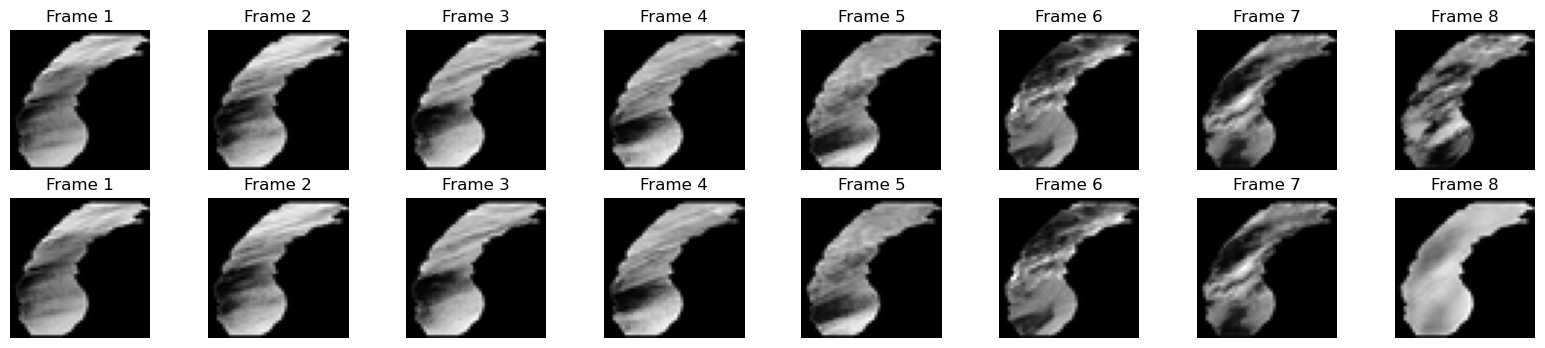

In [423]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 7 frames and all the frames from the example
frames = example[:7, ...]
original_frames = example[:, ...]

# Use the first 7 frames to predict the next  frame
for _ in range(1):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 8, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 8 original frames.")
print("The bottom row consists of the 7 original frames and the next predicted one.")
plt.show()

The prediction is not that great: Frame 8 below does not match frame 8 above in intensity, albeit it does match a bit in shape.

>**Conclusion**: Imagery by itself (and meteo by itself) is ***not enough to do ML-style weather prediction***. At least with the techniques we employed in this notebook. This is an important result in itself.

Now let's see what happens if we combine imagery and meteo data: We're going to attempt to predict rain based on cloud imagery the day before *and* meteo day before *and* nighttime as well.

# 10. Predicting rain from past imagery *and* meteo
We're going to start with one daytime's worth of cloud imagery, and one datyime plus one nighttime worth's of meteo data.

We're going to use a ConvLSTM2D for imagery, and an LSTM for meteo.

Instead of predicting cloud frames, which we know is challenging based on our past experiments, we're going to attempt to predict daily precipitation.

So now I need to go back to my original dataset, which includes nighttime meteo data:

In [424]:
les

Date_UTC Time_UTC    Date_CST Time_CST  \
0      2006-10-01    00:00  2006-09-30    00:00   
1      2006-10-01    01:00  2006-09-30    01:00   
2      2006-10-01    02:00  2006-09-30    02:00   
3      2006-10-01    03:00  2006-09-30    03:00   
4      2006-10-01    04:00  2006-09-30    04:00   
...           ...      ...         ...      ...   
48116  2015-03-31    19:00  2015-03-31    19:00   
48117  2015-03-31    20:00  2015-03-31    20:00   
48118  2015-03-31    21:00  2015-03-31    21:00   
48119  2015-03-31    22:00  2015-03-31    22:00   
48120  2015-03-31    23:00  2015-03-31    23:00   

                           File_name_for_1D_lake  \
0      goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1      goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2      goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3      goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4      goes11.2006.10.01.0400.v01.nc-var1-t0.csv   
...                                          ...   
48116  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
48117  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
48118  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   
48119  goes15.2015.03.31.2200.v01.nc-var1-t0.csv   
48120  goes15.2015.03.31.2300.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
0      T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1      T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2      T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3      T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4      T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   
...                                                ...   
48116  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
48117  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
48118  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   
48119  T_goes15.2015.03.31.2200.v01.nc-var1-t0.csv.csv   
48120  T_goes15.2015.03.31.2300.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
0      [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1      [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2      [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3      [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4      [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   
...                                                  ...   
48116  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
48117  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
48118  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   
48119  [0.17999999, 0.16749999, 0.16749999, 0.16, 0.1...   
48120  [0.1275, 0.1125, 0.1275, 0.1125, 0.1175, 0.11,...   

                                            Lake_data_2D  Temp_F  RH_pct  ...  \
0      [array([   nan,    nan,    nan,    nan,    nan...    48.0    86.0  ...   
1      [array([   nan,    nan,    nan,    nan,    nan...    48.0    86.0  ...   
2      [array([nan, nan, nan, nan, nan, nan, nan, nan...    48.0    86.0  ...   
3      [array([nan, nan, nan, nan, nan, nan, nan, nan...    48.0    86.0  ...   
4      [array([   nan,    nan,    nan,    nan,    nan...    48.0    89.0  ...   
...                                                  ...     ...     ...  ...   
48116  [array([       nan,        nan,        nan,   ...    37.0    66.0  ...   
48117  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0  ...   
48118  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0  ...   
48119  [array([   nan,    nan,    nan,    nan,    nan...    36.0    81.0  ...   
48120  [array([   nan,    nan,    nan,    nan,    nan...    32.0    92.0  ...   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
0                     150                   0             4100   
1                     150                   0             6000   
2                       0                   0             5500   
3                     150                   0             6000   
4                       0                   0     

In [427]:
les.head(5)

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D  Temp_F  RH_pct  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...    48.0    86.0  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...    48.0    86.0  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...    48.0    86.0  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...    48.0    86.0  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...    48.0    89.0  ...   

   Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                 150                   0             4100             4800   
1                 150                   0             6000                0   
2                   0                   0             5500            11000   
3                 150                   0             6000                0   
4                   0                   0             2200             3500   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0              7000             10          984.0             1007.0   
1                 0             10          983.7             1006.5   
2                 0             10          982.7             1005.7   
3                 0             10          982.0             1005.1   
4                 0              8          982.0             1004.9   

   Altimeter_hPa  Precip_in  
0         1006.8       0.00  
1         1006.4       0.00  
2         1005.4       0.00  
3         1004.7       0.00  
4         1004.7       0.02  

[5 rows x 22 columns]

In [426]:
les.head(32)

Date_UTC Time_UTC    Date_CST Time_CST  \
0   2006-10-01    00:00  2006-09-30    00:00   
1   2006-10-01    01:00  2006-09-30    01:00   
2   2006-10-01    02:00  2006-09-30    02:00   
3   2006-10-01    03:00  2006-09-30    03:00   
4   2006-10-01    04:00  2006-09-30    04:00   
5   2006-10-01    05:00  2006-09-30    05:00   
6   2006-10-01    06:00  2006-10-01    06:00   
7   2006-10-01    07:00  2006-10-01    07:00   
8   2006-10-01    08:00  2006-10-01    08:00   
9   2006-10-01    09:00  2006-10-01    09:00   
10  2006-10-01    10:00  2006-10-01    10:00   
11  2006-10-01    11:00  2006-10-01    11:00   
12  2006-10-01    12:00  2006-10-01    12:00   
13  2006-10-01    13:00  2006-10-01    13:00   
14  2006-10-01    14:00  2006-10-01    14:00   
15  2006-10-01    15:00  2006-10-01    15:00   
16  2006-10-01    16:00  2006-10-01    16:00   
17  2006-10-01    17:00  2006-10-01    17:00   
18  2006-10-01    18:00  2006-10-01    18:00   
19  2006-10-01    19:00  2006-10-01    19:00   
20  2006-10-01    20:00  2006-10-01    20:00   
21  2006-10-01    21:00  2006-10-01    21:00   
22  2006-10-01    22:00  2006-10-01    22:00   
23  2006-10-01    23:00  2006-10-01    23:00   
24  2006-10-02    00:00  2006-10-01    00:00   
25  2006-10-02    01:00  2006-10-01    01:00   
26  2006-10-02    02:00  2006-10-01    02:00   
27  2006-10-02    03:00  2006-10-01    03:00   
28  2006-10-02    04:00  2006-10-01    04:00   
29  2006-10-02    05:00  2006-10-01    05:00   
30  2006-10-02    06:00  2006-10-02    06:00   
31  2006-10-02    07:00  2006-10-02    07:00   

                        File_name_for_1D_lake  \
0   goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1   goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2   goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3   goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4   goes11.2006.10.01.0400.v01.nc-var1-t0.csv   
5   goes11.2006.10.01.0500.v01.nc-var1-t0.csv   
6   goes11.2006.10.01.0600.v01.nc-var1-t0.csv   
7   goes11.2006.10.01.0700.v01.nc-var1-t0.csv   
8                                        None   
9                                        None   
10  goes11.2006.10.01.1000.v01.nc-var1-t0.csv   
11  goes11.2006.10.01.1100.v01.nc-var1-t0.csv   
12  goes11.2006.10.01.1200.v01.nc-var1-t0.csv   
13  goes11.2006.10.01.1300.v01.nc-var1-t0.csv   
14  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
15  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
16  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
17  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
18  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
19  goes11.2006.10.01.1900.v01.nc-var1-t0.csv   
20  goes11.2006.10.01.2000.v01.nc-var1-t0.csv   
21  goes11.2006.10.01.2100.v01.nc-var1-t0.csv   
22  goes11.2006.10.01.2200.v01.nc-var1-t0.csv   
23  goes11.2006.10.01.2300.v01.nc-var1-t0.csv   
24  goes11.2006.10.02.0000.v01.nc-var1-t0.csv   
25  goes11.2006.10.02.0100.v01.nc-var1-t0.csv   
26  goes11.2006.10.02.0200.v01.nc-var1-t0.csv   
27  goes11.2006.10.02.0300.v01.nc-var1-t0.csv   
28  goes11.2006.10.02.0400.v01.nc-var1-t0.csv   
29  goes11.2006.10.02.0500.v01.nc-var1-t0.csv   
30  goes11.2006.10.02.0600.v01.nc-var1-t0.csv   
31  goes11.2006.10.02.0700.v01.nc-var1-t0.csv   

                              File_name_for_2D_lake  \
0   T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1   T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2   T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3   T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4   T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   
5   T_goes11.2006.10.01.0500.v01.nc-var1-t0.csv.csv   
6   T_goes11.2006.10.01.0600.v01.nc-var1-t0.csv.csv   
7   T_goes11.2006.10.01.0700.v01.nc-var1-t0.csv.csv   
8                                              None   
9                                              None   
10  T_goes11.2006.10.01.1000.v01.nc-var1-t0.csv.csv   
11  T_goes11.2006.10.01.1100.v01.nc-var1-t0.csv.csv   
12  T_goes11.2006.10.01.1200.v01.nc-var1-t0.csv.csv   
13  T_goes11.2006.10.01.1300.v01.

So we see that our original dataset starts at time 00:00 UTC, goes up to 23:00, and back to 00:00 (of the next day).

Whereas `filtered_les` goes from 14:00 UTC (9A local time Traverse City) up to 21:00 UTC (4P local time Traverse City).

Central Standard Time (North America) is 6 hours behind from the UTC universal time, but:

- Traverse City, Michigan is GMT/UTC - 5h during Standard Time.

- Traverse City, Michigan is GMT/UTC - 4h during Daylight Saving Time 

In [430]:
filtered_les.head(32)

File_name_for_1D_lake  \
0   goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1   goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2   goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3   goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4   goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
5   goes11.2006.10.01.1900.v01.nc-var1-t0.csv   
6   goes11.2006.10.01.2000.v01.nc-var1-t0.csv   
7   goes11.2006.10.01.2100.v01.nc-var1-t0.csv   
8   goes11.2006.10.02.1400.v01.nc-var1-t0.csv   
9   goes11.2006.10.02.1500.v01.nc-var1-t0.csv   
10  goes11.2006.10.02.1600.v01.nc-var1-t0.csv   
11  goes11.2006.10.02.1700.v01.nc-var1-t0.csv   
12  goes11.2006.10.02.1800.v01.nc-var1-t0.csv   
13  goes11.2006.10.02.1900.v01.nc-var1-t0.csv   
14  goes11.2006.10.02.2000.v01.nc-var1-t0.csv   
15  goes11.2006.10.02.2100.v01.nc-var1-t0.csv   
16  goes11.2006.10.03.1400.v01.nc-var1-t0.csv   
17  goes11.2006.10.03.1500.v01.nc-var1-t0.csv   
18  goes11.2006.10.03.1600.v01.nc-var1-t0.csv   
19  goes11.2006.10.03.1700.v01.nc-var1-t0.csv   
20  goes11.2006.10.03.1800.v01.nc-var1-t0.csv   
21  goes11.2006.10.03.1900.v01.nc-var1-t0.csv   
22  goes11.2006.10.03.2000.v01.nc-var1-t0.csv   
23  goes11.2006.10.03.2100.v01.nc-var1-t0.csv   
24  goes11.2006.10.04.1400.v01.nc-var1-t0.csv   
25  goes11.2006.10.04.1500.v01.nc-var1-t0.csv   
26  goes11.2006.10.04.1600.v01.nc-var1-t0.csv   
27  goes11.2006.10.04.1700.v01.nc-var1-t0.csv   
28  goes11.2006.10.04.1800.v01.nc-var1-t0.csv   
29  goes11.2006.10.04.1900.v01.nc-var1-t0.csv   
30  goes11.2006.10.04.2000.v01.nc-var1-t0.csv   
31  goes11.2006.10.04.2100.v01.nc-var1-t0.csv   

                              File_name_for_2D_lake  \
0   T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1   T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2   T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3   T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4   T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
5   T_goes11.2006.10.01.1900.v01.nc-var1-t0.csv.csv   
6   T_goes11.2006.10.01.2000.v01.nc-var1-t0.csv.csv   
7   T_goes11.2006.10.01.2100.v01.nc-var1-t0.csv.csv   
8   T_goes11.2006.10.02.1400.v01.nc-var1-t0.csv.csv   
9   T_goes11.2006.10.02.1500.v01.nc-var1-t0.csv.csv   
10  T_goes11.2006.10.02.1600.v01.nc-var1-t0.csv.csv   
11  T_goes11.2006.10.02.1700.v01.nc-var1-t0.csv.csv   
12  T_goes11.2006.10.02.1800.v01.nc-var1-t0.csv.csv   
13  T_goes11.2006.10.02.1900.v01.nc-var1-t0.csv.csv   
14  T_goes11.2006.10.02.2000.v01.nc-var1-t0.csv.csv   
15  T_goes11.2006.10.02.2100.v01.nc-var1-t0.csv.csv   
16  T_goes11.2006.10.03.1400.v01.nc-var1-t0.csv.csv   
17  T_goes11.2006.10.03.1500.v01.nc-var1-t0.csv.csv   
18  T_goes11.2006.10.03.1600.v01.nc-var1-t0.csv.csv   
19  T_goes11.2006.10.03.1700.v01.nc-var1-t0.csv.csv   
20  T_goes11.2006.10.03.1800.v01.nc-var1-t0.csv.csv   
21  T_goes11.2006.10.03.1900.v01.nc-var1-t0.csv.csv   
22  T_goes11.2006.10.03.2000.v01.nc-var1-t0.csv.csv   
23  T_goes11.2006.10.03.2100.v01.nc-var1-t0.csv.csv   
24  T_goes11.2006.10.04.1400.v01.nc-var1-t0.csv.csv   
25  T_goes11.2006.10.04.1500.v01.nc-var1-t0.csv.csv   
26  T_goes11.2006.10.04.1600.v01.nc-var1-t0.csv.csv   
27  T_goes11.2006.10.04.1700.v01.nc-var1-t0.csv.csv   
28  T_goes11.2006.10.04.1800.v01.nc-var1-t0.csv.csv   
29  T_goes11.2006.10.04.1900.v01.nc-var1-t0.csv.csv   
30  T_goes11.2006.10.04.2000.v01.nc-var1-t0.csv.csv   
31  T_goes11.2006.10.04.2100.v01.nc-var1-t0.csv.csv   

                                         Lake_data_1D  \
0   [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1   [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2   [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3   [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4   [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
5   [0.0925, 0.095, 0.0925, 0.074999996, 0.0875, 0...   
6   [0.099999994, 0.095, 0.0975, 0.099999994, 0.11...   
7   [0.11, 0.105, 0.0975, 0.107499994, 0.099999994...   
8   [0.37, 0.325, 0.2575, 0.2075, 0.2175, 0.295, 0...   
9   [0.16, 0.285, 0.

In [428]:
les.columns

Index(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake',
       'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp_F',
       'RH_pct', 'Dewpt_F', 'Wind_Spd_mph', 'Wind_Direction_deg',
       'Peak_Wind_Gust_mph', 'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft',
       'High_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
       'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'Precip_in'],
      dtype='object')

## Data prep for cloud imagery and meteo datasets
### Meteo training and validation
We remove some highly correlated features, and redundant ones.

Specifically, we will remove 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake',
'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Dewpt_F', 'Peak_Wind_Gust_mph', and maybe 'Altimeter_hPa' because highly correlated with 'Atm_Press_hPa'.

Our network will consists of two networks, a ConvLSTM2D network for Cloud imagery, and an LSTM network for meteo data.

Each observation will consists of sequences: A sequence of 8 daytime hours for the imagery network, and a sequence of 24 hours for the meteo network.

First, we are going to attempt to determine if it rains at all the next day, from information from the previous day (imagery *and* meteo).

We are going to say that it rains on any day if it rains for at least one hour and more than 10% of...

If successful, we can attempt to push the boundary and predict longer into the future.

This is how we can going to create our LSTM tensor for meteo data:

In [434]:
a = []
for i in range(50):
    a.append(np.arange(i, i + 4).reshape((2, 2)))
a

[array([[0, 1],
        [2, 3]]),
 array([[1, 2],
        [3, 4]]),
 array([[2, 3],
        [4, 5]]),
 array([[3, 4],
        [5, 6]]),
 array([[4, 5],
        [6, 7]]),
 array([[5, 6],
        [7, 8]]),
 array([[6, 7],
        [8, 9]]),
 array([[ 7,  8],
        [ 9, 10]]),
 array([[ 8,  9],
        [10, 11]]),
 array([[ 9, 10],
        [11, 12]]),
 array([[10, 11],
        [12, 13]]),
 array([[11, 12],
        [13, 14]]),
 array([[12, 13],
        [14, 15]]),
 array([[13, 14],
        [15, 16]]),
 array([[14, 15],
        [16, 17]]),
 array([[15, 16],
        [17, 18]]),
 array([[16, 17],
        [18, 19]]),
 array([[17, 18],
        [19, 20]]),
 array([[18, 19],
        [20, 21]]),
 array([[19, 20],
        [21, 22]]),
 array([[20, 21],
        [22, 23]]),
 array([[21, 22],
        [23, 24]]),
 array([[22, 23],
        [24, 25]]),
 array([[23, 24],
        [25, 26]]),
 array([[24, 25],
        [26, 27]]),
 array([[25, 26],
        [27, 28]]),
 array([[26, 27],
        [28, 29]]),
 a

In [437]:
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(a, None, 24, sequence_stride=24, sampling_rate=1, batch_size=50)

In [438]:
for batch in x3:
    print(batch)
    print('--')

tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 1  2]
   [ 3  4]]

  [[ 2  3]
   [ 4  5]]

  [[ 3  4]
   [ 5  6]]

  [[ 4  5]
   [ 6  7]]

  [[ 5  6]
   [ 7  8]]

  [[ 6  7]
   [ 8  9]]

  [[ 7  8]
   [ 9 10]]

  [[ 8  9]
   [10 11]]

  [[ 9 10]
   [11 12]]

  [[10 11]
   [12 13]]

  [[11 12]
   [13 14]]

  [[12 13]
   [14 15]]

  [[13 14]
   [15 16]]

  [[14 15]
   [16 17]]

  [[15 16]
   [17 18]]

  [[16 17]
   [18 19]]

  [[17 18]
   [19 20]]

  [[18 19]
   [20 21]]

  [[19 20]
   [21 22]]

  [[20 21]
   [22 23]]

  [[21 22]
   [23 24]]

  [[22 23]
   [24 25]]

  [[23 24]
   [25 26]]]


 [[[24 25]
   [26 27]]

  [[25 26]
   [27 28]]

  [[26 27]
   [28 29]]

  [[27 28]
   [29 30]]

  [[28 29]
   [30 31]]

  [[29 30]
   [31 32]]

  [[30 31]
   [32 33]]

  [[31 32]
   [33 34]]

  [[32 33]
   [34 35]]

  [[33 34]
   [35 36]]

  [[34 35]
   [36 37]]

  [[35 36]
   [37 38]]

  [[36 37]
   [38 39]]

  [[37 38]
   [39 40]]

  [[38 39]
   [40 41]]

  [[39 40]
   [41 42]]

  [[40 41]
   [42 43]]

  [

So I have two observations, with each being a sequence of 24 hours of data (a 2$\times$2) matrix here for the simulation).

Let's do this for our meteo data:

In [432]:
meteo_les = les.drop(
    [ 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 
     'Lake_data_1D', 'Lake_data_2D', 'Dewpt_F', 'Peak_Wind_Gust_mph', 'Altimeter_hPa' ], axis=1)

In [433]:
meteo_les.head()

Temp_F  RH_pct  Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  \
0    48.0    86.0             7                 150             4100   
1    48.0    86.0             8                 150             6000   
2    48.0    86.0             6                   0             5500   
3    48.0    86.0             8                 150             6000   
4    48.0    89.0             5                   0             2200   

   Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
0             4800              7000             10          984.0   
1                0                 0             10          983.7   
2            11000                 0             10          982.7   
3                0                 0             10          982.0   
4             3500                 0              8          982.0   

   Sea_Lev_Press_hPa  Precip_in  
0             1007.0       0.00  
1             1006.5       0.00  
2             1005.7       0.00  
3             1005.1       0.00  
4             1004.9       0.02

In [439]:
len(meteo_les)

47882

In [440]:
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les, None, 24, sequence_stride=24, sampling_rate=1, 
                                                          batch_size=50000)

In [441]:
for batch in x3:
    print(batch.shape)
    print('--')

(1995, 24, 11)
--


So we have 1,995 observations of 24 hours of meteo data consisting of 11 features.

But first we need to split our dataset into training and validation.

We agreed to use the first 10,000 rows of `filtered_les` as training data. Since 8 observations of that dataset correspond to 24 observations of the `meteo_les` dataset, we have 3 times more meteo observations than imagery, So we will use:

In [487]:
meteo_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[0:30000], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=30000)

In [505]:
meteo_train = None
for batch in meteo_train_batched:
    meteo_train = batch
    print(meteo_train.shape)
    print('--')

(1250, 24, 11)
--


Since we started our validation dataset for imagery at index 13,050 and we had 15,959 instances of imagery, let's agree to use the last 2,500 instances of imagery as our validation dataset (skipping some intermediate `nan` instances). That corresponds to $2500 \times 3 = 7500$ rows of meteo data.

In [490]:
meteo_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[:7500], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=7500)

In [504]:
meteo_val = None
for batch in meteo_val_batched:
    meteo_val = batch
    print(meteo_val.shape)
    print('--')

(312, 24, 11)
--


So we have about 3 times more traiing data than test data.

### Cloud imagery training and validation datasets
We can probably use `les_filtered` to gather our imagery data, just liked we did previously. But now our training dataset will consist of 8 hours of imagery and the label will be rain or not *the next day*.

Let's create our imagery training data:

In [492]:
cloud_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:10000], None, 8, sequence_stride=8, 
                                                                           sampling_rate=1, batch_size=10000)

In [493]:
cloud_train = None
for batch in cloud_train_batched:
    cloud_train = batch
    cloud_train = np.expand_dims(cloud_train, axis=-1)
    print(cloud_train.shape)
    cloud_train = cloud_train / 255
    print('--')

(1250, 8, 48, 48, 1)
--


And test data:

In [495]:
cloud_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:2500], None, 8, sequence_stride=8, 
                                                                         sampling_rate=1, batch_size=2500)

In [496]:
cloud_val = None
for batch in cloud_val_batched:
    cloud_val = batch
    cloud_val = np.expand_dims(cloud_val, axis=-1)
    print(cloud_val.shape)
    cloud_val = cloud_val / 255
    print('--')

(312, 8, 48, 48, 1)
--


### Final rain classification label
Finally, let's create our label:

In [ ]:
rain_train = []
for batch in meteo_train:
    for i in range(batch.shape[0]):
        print(batch[i,:,-1].numpy())
        break

This is how much precipitation in 24 hours:

In [480]:
rain_train = []
for batch in meteo_train:
    for i in range(batch.shape[0]):
        rain_train.append(sum(batch[i,:,-1].numpy()))
        
len(rain_train)

1250

In [481]:
print(rain_train)

[0.03, 0.01, 2.02, 0.01, 0.33999999999999997, 0.0, 0.0, 0.0, 0.0, 0.05, 0.3500000000000001, 0.25, 0.3, 0.14, 0.01, 0.04, 0.3400000000000001, 0.23, 0.09000000000000001, 0.0, 0.24000000000000002, 0.11, 0.4800000000000001, 0.04, 0.02, 0.0, 0.0, 0.24000000000000005, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23, 0.0, 0.0, 0.04, 0.0, 0.0, 0.0, 0.0, 0.01, 0.09, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.11, 0.3400000000000001, 0.0, 0.6200000000000001, 0.01, 0.04, 0.0, 0.01, 0.01, 0.03, 0.0, 0.0, 0.0, 0.03, 0.12, 0.01, 0.07, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.51, 0.09, 0.11, 0.0, 0.02, 0.01, 0.05, 0.0, 0.0, 0.14, 0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.05, 0.01, 0.05, 0.0, 0.02, 0.01, 0.01, 0.01, 0.13, 0.13, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.02, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.01, 0.04, 0.0, 0.0, 0.02, 0.0, 0.08, 0.0, 0.05, 0.060000000000000005, 0.18000000000000002, 0.0, 0.04, 0.0

Let's train for *serious* rain, more than 0.10 precipitation per day (is that enough?):

In [482]:
rain_train_b = [1 if 0.10 <= r else 0 for r in rain_train]

In [483]:
print(rain_train_b)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

(array([1053.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         197.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

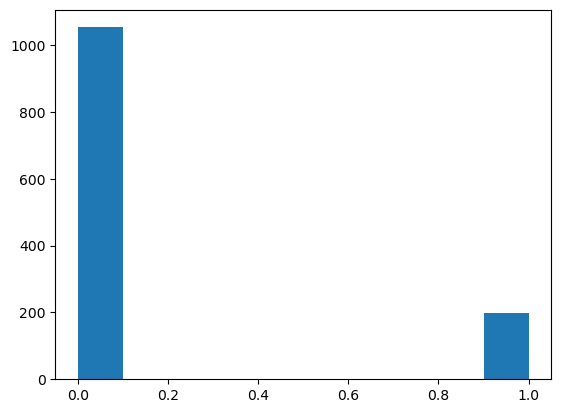

In [484]:
plt.hist(rain_train_b)

In [497]:
rain_train_c = np.array(rain_train_b)
rain_train_c.shape

(1250,)

In [485]:
rain_val = []
for batch in meteo_val:
    for i in range(batch.shape[0]):
        rain_val.append(sum(batch[i,:,-1].numpy()))
        
len(rain_val)

312

In [486]:
rain_val_b = [1 if 0.10 <= r else 0 for r in rain_val]

In [498]:
rain_val_c = np.array(rain_val_b)
rain_val_c.shape

(312,)

## Network
### Imagery Network

In [501]:
cloud_train.shape, rain_train_c.shape, cloud_val.shape, rain_val_c.shape

((1250, 8, 48, 48, 1), (1250,), (312, 8, 48, 48, 1), (312,))

First, let's learn how shapes get transformed through convolution. 

Assume our input consists of a 21-long sequence of 48 $\times$ 48 images. One way to process the sequences is to add the sequence dimension as a channel and use the traditional `Conv2D` api.

[Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)(`filters`, `kernel_size`, `strides=(1, 1)`, ...)

Note that the shape-shifting operators are `filters` and `strides`.

In [521]:
from keras.layers import Dropout, GlobalAveragePooling2D, MaxPooling2D

input_cnn = layers.Input(shape=(48,48,21))
print("layers.Input(shape=(48,48,21))", input_cnn.shape)
x = layers.Conv2D(3, (3, 3), (2,2), padding='same', activation='selu')(input_cnn)
print("layers.Conv2D(3, (3, 3), (2,2)", x.shape)
x = MaxPooling2D(pool_size=(2,2))(x)
print("MaxPooling2D(pool_size=(2,2))", x.shape)
x = layers.Conv2D(6, (3, 3), (2,2), padding='same', activation='selu')(x)
print("layers.Conv2D(6, (3, 3), (2,2)", x.shape)
x = MaxPooling2D(pool_size=(2,2))(x)
print("MaxPooling2D(pool_size=(2,2)", x.shape)
x = GlobalAveragePooling2D()(x)
print("GlobalAveragePooling2D", x.shape)
do.shape

layers.Input(shape=(48,48,21)) (None, 48, 48, 21)
layers.Conv2D(3, (3, 3), (2,2) (None, 24, 24, 3)
MaxPooling2D(pool_size=(2,2)) (None, 12, 12, 3)
layers.Conv2D(6, (3, 3), (2,2) (None, 6, 6, 6)
MaxPooling2D(pool_size=(2,2) (None, 3, 3, 6)
GlobalAveragePooling2D (None, 6)


TensorShape([None, 8])

Instead, if we want to use the more orthodox [ConvLSTM2D](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)(`filters`, `kernel_size`, `strides=(1, 1)`, ...) on 8-long sequences of images (with one gray channel):

In [522]:
cloud_train.shape, rain_train_c.shape, cloud_val.shape, rain_val_c.shape

((1250, 8, 48, 48, 1), (1250,), (312, 8, 48, 48, 1), (312,))

In [524]:
cloud_train.shape[2:]

(48, 48, 1)

We can stack 3 `ConvLSTM2D` layers with batch normalization, followed by a `Conv3D` layer for the spatiotemporal outputs.

[Conv3D](https://keras.io/api/layers/convolution_layers/convolution3d/) api is: `layers.Conv3D( filters, kernel_size, strides=(1, 1, 1), ...`.

Here are some examples:

In [540]:
# The inputs are 28x28x28 volumes with a single channel, and the batch size is 4
input_shape =(4, 28, 28, 28, 1)
x = tf.random.normal(input_shape)
print(x.shape)
y = tf.keras.layers.Conv3D(2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 28, 1)
(4, 28, 28, 28, 2)


In [541]:
# With extended batch shape [4, 7], e.g. a batch of 4 videos of 3D frames, with 7 frames per video.
input_shape = (4, 7, 28, 28, 28, 1)
x = tf.random.normal(input_shape)
print(x.shape)
y = tf.keras.layers.Conv3D(2, 3, activation='relu', padding="same", input_shape=input_shape[2:])(x)
print(y.shape)

(4, 7, 28, 28, 28, 1)
(4, 7, 28, 28, 28, 2)


Ok, here's our stack of 3 `ConvLSTM2D` layers with batch normalization, followed by a `Conv3D` layer for the spatiotemporal outputs.

Since the padding is `same` and `stride` defaults to `(1,1)`, our images remain the same size through the stack.

In [567]:
# Construct the input layer with no definite frame size (None below could be replaced by 8)
inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
print("layers.Input(shape=", inp.shape)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D filters=64, kernel_size=(5, 5)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

layers.Input(shape= (None, None, 48, 48, 1)
ConvLSTM2D filters=64, kernel_size=(5, 5) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D filters=64, kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D filters=64, kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


So this network is appropriate when the input is `z` number of observations, each one a sequence of `t` grayscale images of size $48 \times 48$, i.e. `(None=z, None=t, 48, 48, 1)`, *and the label is a sequence of exactly the same size*: `(None=z, None=t, 48, 48, 1)`.

If we want to predict rain or not, which is just a binary label, then we need a network that reduces from `(None=z, None=t, 48, 48, 1)` to `{None, q)`, where q will be the vector to be concatenated with the final meteo vector and then passed through a Dense layer for the final binary rain yes/no! 

So it makes sense to *slowly* reduce the size of the image, *and* also to flatten the size of the sequence. We can slowly reduce the size of our images with strides larger than `(1,1)` in our convolutions, and we can flatten our sequence to a single dimension with `return_sequences=False` in our last convolution layer. For example, this way:

In [569]:
# Construct the input layer with no definite frame size (None below could be replaced by 8)
inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
print("layers.Input(shape=", inp.shape)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True", x.shape)
x = layers.Conv3D(
    filters=8, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Note that MaxPooling2D takes in a 4D input and downsamples the input along its spatial dimensions (height and width) by 
# taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window 
# is shifted by strides along each dimension. The first dim is observattions, the next 2 dims are height and width, and 
# the last dim is channels. So it downsamples only the two intermediate dimensions (height and width). If i do the follwing:
# x = MaxPooling2D(pool_size=(2,2))(x[:, :, :, :, 0])
# .. it will work but it will assume that the number of channels is 6 and leave them untouched. That is not what I want! I 
# want to downsample the sequence dimension!

# Better to use an additional convolution layer with return_sequences=False
print("Conv3D kernel_size=(3, 3, 3)", x.shape)
x = layers.ConvLSTM2D(
    filters=8,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=False,
    activation="relu",
)(x)
print("ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)

#x = layers.Dense(1)(x)
#print("Dense", x.shape)
x = GlobalAveragePooling2D()(x)
print("GlobalAveragePooling2D", x.shape)

layers.Input(shape= (None, None, 48, 48, 1)
ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True (None, None, 24, 24, 64)
BatchNormalization (None, None, 24, 24, 64)
ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True (None, None, 12, 12, 64)
BatchNormalization (None, None, 12, 12, 64)
ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True (None, None, 6, 6, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 6, 6, 8)
ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False (None, 3, 3, 8)
BatchNormalization (None, 3, 3, 8)
GlobalAveragePooling2D (None, 8)


### Meteo network

In [506]:
meteo_train.shape, rain_train_c.shape, meteo_val.shape, rain_val_c.shape

(TensorShape([1250, 24, 11]), (1250,), TensorShape([312, 24, 11]), (312,))

In [573]:
meteo_train.shape[1:]

TensorShape([24, 11])

In [575]:
RNN = layers.LSTM
hidden_size = 8
#data_shape = (24, 11)
#data = layers.Input(shape= data_shape)
meteo_inp = layers.Input(shape=(None, *meteo_train.shape[1:]))
print("layers.Input(shape=", meteo_inp.shape)
lstm1 = RNN(hidden_size, input_shape=(24, data_shape[1]), return_sequences= True)(data)
lstm2 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= False)(lstm1)
lstm2.shape

layers.Input(shape= (None, None, 24, 11)


TensorShape([None, 8])

### Imagery + meteo
Our final classification into rain or no rain, based on a balanced amount of information from both imagery and meteo:

In [576]:
# Flatten the output of CNN
#flattened = layers.Flatten()(conv6)

# Connect the CNN output and RNN output to a dense layer with 1 neuron for final 0/1 outputs
final = layers.Concatenate(axis=1)([lstm2, x])
print("layers.Concatenate(axis=1)([lstm2, x])", final.shape)
out = layers.Dense(1, activation='sigmoid')(final)
print("layers.Dense(1)", out.shape)

layers.Concatenate(axis=1)([lstm2, x]) (None, 16)
layers.Dense(1) (None, 1)


In [577]:
# Using both, images and numerical data as input
#inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
#data = layers.Input(shape= (24, 11))
model = keras.models.Model([inp, data], out)  
#model = keras.models.Model(inp, x)

# Build model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam())
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_61 (InputLayer)          [(None, None, 48, 4  0           []                               
                                8, 1)]                                                            
                                                                                                  
 conv_lstm2d_119 (ConvLSTM2D)   (None, None, 24, 24  416256      ['input_61[0][0]']               
                                , 64)                                                             
                                                                                                  
 batch_normalization_83 (BatchN  (None, None, 24, 24  256        ['conv_lstm2d_119[0][0]']        
 ormalization)                  , 64)                                                      

## Training

In [578]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 8

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    [cloud_train, meteo_train],
    rain_train_c,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([cloud_val, meteo_val], rain_val_c),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 21:55:22
Epoch 1/100
157/157 [==============================] - 34s 148ms/step - loss: 0.5058 - val_loss: 0.4320 - lr: 0.0010
Epoch 2/100
157/157 [==============================] - 22s 140ms/step - loss: 0.4268 - val_loss: 0.4707 - lr: 0.0010
Epoch 3/100
157/157 [==============================] - 22s 139ms/step - loss: 0.4043 - val_loss: 0.4614 - lr: 0.0010
Epoch 4/100
157/157 [==============================] - 22s 139ms/step - loss: 0.3877 - val_loss: 0.3893 - lr: 0.0010
Epoch 5/100
157/157 [==============================] - 23s 144ms/step - loss: 0.3814 - val_loss: 0.4023 - lr: 0.0010
Epoch 6/100
157/157 [==============================] - 23s 144ms/step - loss: 0.3816 - val_loss: 0.4325 - lr: 0.0010
Epoch 7/100
157/157 [==============================] - 22s 142ms/step - loss: 0.3650 - val_loss: 0.3742 - lr: 0.0010
Epoch 8/100
157/157 [==============================] - 22s 139ms/step - loss: 0.3652 - val_loss: 0.3730 - lr: 0.0010
Epoch 9/100
157/157 [==============

That looks pretty good :-) It looks like I can keep on training, too!

Let's look at accuracy:

In [582]:
cloud_val.shape, tf.convert_to_tensor(cloud_val).shape, meteo_val.shape

((312, 8, 48, 48, 1),
 TensorShape([312, 8, 48, 48, 1]),
 TensorShape([312, 24, 11]))

In [590]:
# Select a random example from the cloud imagery validation dataset
example_index = np.random.choice(range(len(cloud_val)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example_clouds = tf.convert_to_tensor(cloud_val[example_index]) # all 8 frames from the example

# Select the same example from the meteo validation dataset
example_meteo = meteo_val[example_index]

# input
#np.expand_dims([example_clouds, example_meteo], axis=0)
[example_clouds, example_meteo]

Picked index 258 from validation dataset.


[<tf.Tensor: shape=(8, 48, 48, 1), dtype=float64, numpy=
 array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.00392157],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.00392157],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.23921569],
          [0.09019608],
          [0.00784314]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
      

In [593]:
model.predict(np.expand_dims([example_clouds, example_meteo], axis=0))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

Interesting, why can't I use the `model.predict()` api?

In [ ]:
# Select a random example from the cloud imagery validation dataset
example_index = np.random.choice(range(len(cloud_val)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example_clouds = tf.convert_to_tensor(cloud_val[example_index]) # all 8 frames from the example

# Select the same example from the meteo validation dataset
example_meteo = meteo_val[example_index]

# Use cloud imagery and meteo to predict rain the next day
# Extract the model's prediction and post-process it
#new_prediction = model.predict(np.expand_dims(frames, axis=0))
#rain_prediction = model.predict(np.expand_dims([example_clouds, example_meteo], axis=0))
rain_prediction = model.predict([example_clouds, example_meteo])
rain_prediction = np.squeeze(rain_prediction, axis=0)

# Compare with label
rain_label = rain_val_c[example_index]

print("prediction:", rain_prediction, "label:", rain_label)

Maybe I can just use `model([])`:

In [598]:
pred = model([cloud_val, meteo_val])

# Convert to array
pred = np.array(pred)

# Assigning class based on prediction
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
#pred[pred != 1] = 0

# Class-wise accuracy
classwise1 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==1)).sum()/(rain_val_c==1).sum()
classwise0 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==0)).sum()/(rain_val_c==0).sum()

In [599]:
print(f'Total Accuracy: \t {((np.array(pred)[:,0] == np.array(rain_val_c)).sum()/len(pred))*100:.3f}')
print('-'*30)
print('--Class wise Accuracy of Test--')
print('-'*30)
print(f'Class 0: \t {classwise0*100:.3f}')
print(f'Class 1: \t {classwise1*100:.3f}')

Total Accuracy: 	 91.987
------------------------------
--Class wise Accuracy of Test--
------------------------------
Class 0: 	 100.000
Class 1: 	 50.000


Total accuracy is pretty good at over 90%. But even though we are 100% accurate in predicting dry days, we are only 50% accurate in predicting precipitation. Surely we can do better..

Let's train some more epochs!

In [600]:
model = keras.models.Model([inp, data], out)  
#model = keras.models.Model(inp, x)

# Build model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_61 (InputLayer)          [(None, None, 48, 4  0           []                               
                                8, 1)]                                                            
                                                                                                  
 conv_lstm2d_119 (ConvLSTM2D)   (None, None, 24, 24  416256      ['input_61[0][0]']               
                                , 64)                                                             
                                                                                                  
 batch_normalization_83 (BatchN  (None, None, 24, 24  256        ['conv_lstm2d_119[0][0]']        
 ormalization)                  , 64)                                                      

In [601]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters
epochs = 500
batch_size = 8

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
history = model.fit(
    [cloud_train, meteo_train],
    rain_train_c,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([cloud_val, meteo_val], rain_val_c),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 00:21:49
Epoch 1/500
157/157 [==============================] - 33s 148ms/step - loss: 0.3186 - val_loss: 0.3315 - lr: 0.0010
Epoch 2/500
157/157 [==============================] - 22s 143ms/step - loss: 0.3354 - val_loss: 0.5408 - lr: 0.0010
Epoch 3/500
157/157 [==============================] - 23s 147ms/step - loss: 0.3321 - val_loss: 0.5521 - lr: 0.0010
Epoch 4/500
157/157 [==============================] - 24s 151ms/step - loss: 0.3278 - val_loss: 0.3245 - lr: 0.0010
Epoch 5/500
157/157 [==============================] - 24s 150ms/step - loss: 0.3333 - val_loss: 0.3587 - lr: 0.0010
Epoch 6/500
157/157 [==============================] - 24s 152ms/step - loss: 0.3304 - val_loss: 0.3529 - lr: 0.0010
Epoch 7/500
157/157 [==============================] - 23s 145ms/step - loss: 0.3255 - val_loss: 0.3318 - lr: 0.0010
Epoch 8/500
157/157 [==============================] - 22s 142ms/step - loss: 0.3312 - val_loss: 0.4951 - lr: 0.0010
Epoch 9/500
157/157 [==============

Oopsie, needed to turn off early stoppping!

Let's see what accuracy we achieved by 157 epochs::

In [603]:
pred = model([cloud_val, meteo_val])

# Convert to array
pred = np.array(pred)

# Assigning class based on prediction
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
#pred[pred != 1] = 0

# Class-wise accuracy
classwise1 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==1)).sum()/(rain_val_c==1).sum()
classwise0 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==0)).sum()/(rain_val_c==0).sum()

In [604]:
print(f'Total Accuracy: \t {((np.array(pred)[:,0] == np.array(rain_val_c)).sum()/len(pred))*100:.3f}')
print('-'*30)
print('--Class wise Accuracy of Test--')
print('-'*30)
print(f'Class 0: \t {classwise0*100:.3f}')
print(f'Class 1: \t {classwise1*100:.3f}')

Total Accuracy: 	 96.795
------------------------------
--Class wise Accuracy of Test--
------------------------------
Class 0: 	 100.000
Class 1: 	 80.000


Nice! 97% total accuracy, and most importantly 80% accuracy on rain prediction!

And we see that we are really learning because validation loss decreases with training loss:

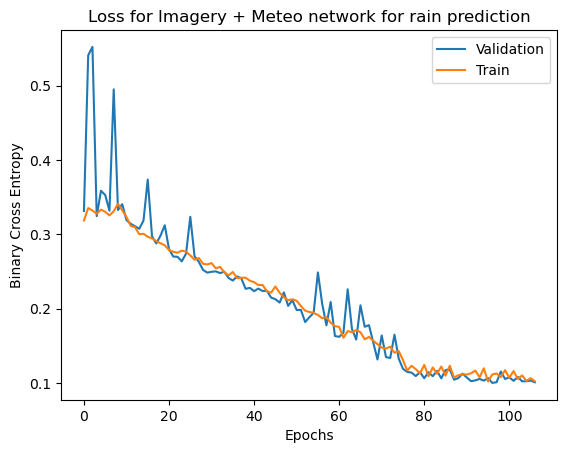

In [607]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['val_loss'], label='Validation')
plt.plot(history.history['loss'], label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Loss for Imagery + Meteo network for rain prediction')
plt.savefig('D:/user/docs/NU/_Noctis/data/Losses-imagery-and-meteo-rain-prediction.png')

# Noctis Challenge
While I'm gone in Greece, this is what Noctis needs to bust his a55 to do:

- We predicted rain the next day from imagery and meteo *the day before*. We need to increase prediction range, so we can be at least 2, preferably 3 days in advance. That means *better data* and *more data* (which Noctis is working on), and maybe a slightly more powerful network based on our last successful one. Noctis' analysis on cloud formation duration should help us pick the best prediction range. I suspect 2 days is doable but 3 will be a challenge.
- We predicted rain equal or above 0.10 precipitation (is that inches?) per day. Is that the right number? I pulled this out of a hat. I think we need to pick a number based on a bit of research: What amount of rain is considered disruptive to municipalities?
- We predicted rain, now let's see if we can predict *snow*. What's the right amount/duration of snow to predict for?
- Based on Noctis' new dataset feature columns, which tag precipitation events with LES effect attribute or not (annulus cloud detection), we can differentiate between LES precipitation and non LES precipitation events! First, this will allow us to characterize LES clouds and increase our understanding of their salient features. Second, we can train a network to predict LES precipitation/snow instead of just precipitation/snow based on when clouds formed (where they convected in, i.e. went through the *annulus*, or did they form on top of the lake?) and their shapes.
- We need to run training and prediction experiments on *each and every meteo station*. We need to be able to answer this important question: Will a network trained on Traverse City be able to predict LES snow in a *different* city, e.g. Chicago, or do we need to train a new Network just for Chicago?

And then... we have a paper that will make Noctis famous and the PhD student of desire of all Universities! In fact, we could even attempt to publish in *Nature* because we make important points about ML-based statistical meteorology.